# Analyzing two-mode networks with python

Demival Vasques Filho (vasquesfilho@ieg-mainz.de).   
(https://www.ieg-mainz.de/en/institute/people/vasques_filho)
  
  
We use networkx, a package (collection of modules) "for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks." (https://networkx.org/)

## Agenda
- Creating a two-mode network
- Projections
- Loading two-mode network data
- Degree distributions
- Overlapping
- Comparing the structure with random networks
- Visualization

## Practice Lecture 1

In [1]:
# Let's start by importing the networkx package and the bipartite algorithms
import networkx as nx
from networkx.algorithms import bipartite

## Creating a two-mode network

A two-mode network is a graph $B={U,V,E}$, where $B$ is the graph composed by a set of nodes (vertices) $U$ and $V$, and a set of links (edges) $E$

In [2]:
#### Networkx does not have a custom bipartite graph class! ####
# custom classes:
#G = nx.Graph() – a simple graph
#Gd = nx.DiGraph() – a directed graph
#M = nx.MultiGraph() – a multigraph
#Md = nx.MultiDiGraph() – a directed multigraph

# We have to use one of these. Here, we will just need to use nx.Graph():
B = nx.Graph()

In [3]:
# Adding nodes is the same as for a one-mode network, but we will use a trick...

# Individual nodes
B.add_node(1, bipartite=0)

# Several nodes
list1 = [2,3,4,5]
B.add_nodes_from(list1, bipartite=0)

# The trick is to identify the type of nodes with node attributes. This way we can build two-mode networks
# or even multi-mode networks

In [4]:
# So far, we just added one type of node: the circles
B.add_nodes_from(["a", "b", "c", "d", "e"], bipartite=1)

In [5]:
# Now we have nodes with the information of to which set they belong as their attributes
print(B.nodes(data=True))

[(1, {'bipartite': 0}), (2, {'bipartite': 0}), (3, {'bipartite': 0}), (4, {'bipartite': 0}), (5, {'bipartite': 0}), ('a', {'bipartite': 1}), ('b', {'bipartite': 1}), ('c', {'bipartite': 1}), ('d', {'bipartite': 1}), ('e', {'bipartite': 1})]


In [6]:
# Networkx doesn't know we are dealing with a two-mode network, so we will always have to inform it.
# Thus, it is better to already define which nodes belong to which sets:
circles = {node for node, att in B.nodes(data=True) if att["bipartite"] == 0}
actors = set(B) - circles

print(circles)
print(actors)

{1, 2, 3, 4, 5}
{'c', 'b', 'e', 'a', 'd'}


In [7]:
# Let's add some links now, but remember:
##### Two-mode networks do not have links between node os the same set! ######
# We can add links individually
B.add_edge(2,'d')

# Or through a list. Let's create a random list with 15 links
import random
r_edge_list = [(random.choice(list(circles)),random.choice(list(actors))) for i in range(15)]

B.add_edges_from(r_edge_list)

print(B.edges())

[(1, 'e'), (1, 'c'), (1, 'a'), (1, 'b'), (2, 'd'), (2, 'c'), (2, 'a'), (3, 'd'), (3, 'e'), (4, 'a'), (5, 'd')]


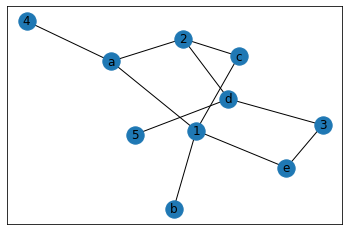

In [8]:
# And simply like that, we have our first two-mode network
nx.draw_networkx(B)

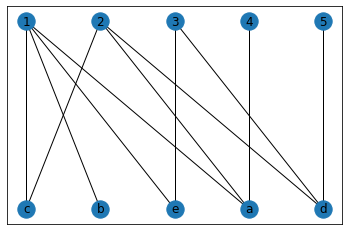

In [9]:
# If we want to organize the different sets of nodes in lines (either horizontal or vertical lines)
nx.draw_networkx(B,pos=nx.bipartite_layout(B, circles, align='horizontal'))

In [10]:
# We can now extract the degree of the circles (size) and actors (activity)
circles_size, actors_act = bipartite.degrees(B,actors) # dictionary: nodes as keys, degrees as values

print(circles_size)
print(actors_act)

[(1, 4), (2, 3), (3, 2), (4, 1), (5, 1)]
[('a', 3), ('c', 2), ('b', 1), ('e', 2), ('d', 3)]


In [11]:
##### Remember: the sum of the circles degree (size) and actors degree (activity) is always equal #####
sum(dict(circles_size).values()) is sum(dict(actors_act).values())

True

## Projections

In [12]:
# With networkx bipartie algorithms, it becomes really simple to create projections

# Onto the set of circles (circles are connected with actors participate in both of them)
Gvs = bipartite.projected_graph(B, circles)
Gvm = bipartite.projected_graph(B, circles, 'MultiGraph')
Gvw = bipartite.weighted_projected_graph(B, circles) # remember: this is the simple weight method

In [13]:
# The degrees of each graph
print(Gvs.degree())
print(Gvm.degree())
print(Gvw.degree())
print(Gvw.degree(weight='weight'))

[(1, 3), (2, 4), (3, 3), (4, 2), (5, 2)]
[(1, 4), (2, 5), (3, 3), (4, 2), (5, 2)]
[(1, 3), (2, 4), (3, 3), (4, 2), (5, 2)]
[(1, 4), (2, 5), (3, 3), (4, 2), (5, 2)]


In [14]:
# The edges of each
print(Gvs.edges(data=True))
print(Gvm.edges(data=True))
print(Gvw.edges(data=True))

[(1, 2, {}), (1, 3, {}), (1, 4, {}), (2, 3, {}), (2, 4, {}), (2, 5, {}), (3, 5, {})]
[(1, 2, {}), (1, 2, {}), (1, 3, {}), (1, 4, {}), (2, 3, {}), (2, 4, {}), (2, 5, {}), (3, 5, {})]
[(1, 2, {'weight': 2}), (1, 3, {'weight': 1}), (1, 4, {'weight': 1}), (2, 3, {'weight': 1}), (2, 4, {'weight': 1}), (2, 5, {'weight': 1}), (3, 5, {'weight': 1})]


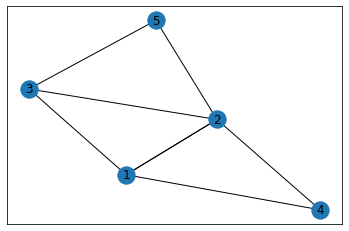

In [15]:
# And a quick visualization again
nx.draw_networkx(Gvm,pos=nx.spring_layout(Gvw))

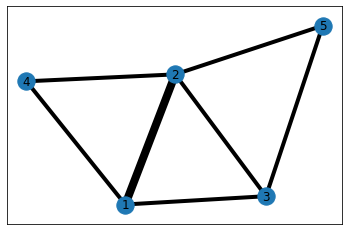

In [16]:
# With link weights
weights = [(Gvw[v][vp]['weight']*4) for v,vp in Gvw.edges()]
nx.draw_networkx(Gvw,pos=nx.spring_layout(Gvw),width=weights)

In [17]:
# Now, we create projections onto the set of actors (actors are connected with the participate 
# in the same circle)
Gs = bipartite.projected_graph(B, actors)
Gm = bipartite.projected_graph(B, actors, 'MultiGraph')
Gw = bipartite.weighted_projected_graph(B, actors) # remember: this is the simple weight method

In [18]:
# The degrees of each graph
print(Gs.degree())
print(Gm.degree())
print(Gw.degree())
print(Gw.degree(weight='weight'))

[('c', 4), ('b', 3), ('e', 4), ('a', 4), ('d', 3)]
[('c', 5), ('b', 3), ('e', 4), ('a', 5), ('d', 3)]
[('c', 4), ('b', 3), ('e', 4), ('a', 4), ('d', 3)]
[('c', 5), ('b', 3), ('e', 4), ('a', 5), ('d', 3)]


In [19]:
# The edges of each
print(Gs.edges(data=True))
print(Gm.edges(data=True))
print(Gw.edges(data=True))

[('c', 'a', {}), ('c', 'e', {}), ('c', 'b', {}), ('c', 'd', {}), ('b', 'a', {}), ('b', 'e', {}), ('e', 'a', {}), ('e', 'd', {}), ('a', 'd', {})]
[('c', 'a', {}), ('c', 'a', {}), ('c', 'e', {}), ('c', 'b', {}), ('c', 'd', {}), ('b', 'a', {}), ('b', 'e', {}), ('e', 'a', {}), ('e', 'd', {}), ('a', 'd', {})]
[('c', 'b', {'weight': 1}), ('c', 'e', {'weight': 1}), ('c', 'd', {'weight': 1}), ('c', 'a', {'weight': 2}), ('b', 'a', {'weight': 1}), ('b', 'e', {'weight': 1}), ('e', 'a', {'weight': 1}), ('e', 'd', {'weight': 1}), ('a', 'd', {'weight': 1})]


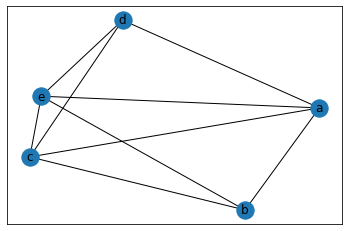

In [20]:
# A quick visualization again for the simple graph
nx.draw_networkx(Gs,pos=nx.spring_layout(Gs))

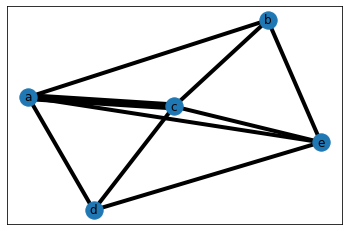

In [21]:
# With link weights
weights = [(Gw[u][up]['weight']*4) for u,up in Gw.edges()]
nx.draw_networkx(Gw,pos=nx.spring_layout(Gw),width=weights)

## Loading two-mode network data  

We will use two data sets here. In one of them, the network data is given as an edge-list: directors (actors) that sit in the board (circles) of companies. In the other, the network data is given as adjacency matrix: mafia members (actors) that participate in meetings (circles). 

References for the data sets:  
* C. Seierstad and T. Opsahl, "For the few not the many? The effects of affirmative action on presence, prominence, and social capital of women directors in Norway." Scand. J. Manag. 27(1), 44-54 (2011)  

* T. di Milano, "Ordinanza di applicazione di misura coercitiva con mandato di cattura-art. 292 cpp (Operazione Infinito)." Ufficio del giudice per le indagini preliminari (in Italian) (2011)

In [22]:
# Let's load the first data set. For that we will use the package pandas, which is really handy for dealing
# with relational data

import pandas as pd
df = pd.read_csv('board-director.csv')

In [23]:
# And here is our dataframe
df

director    board
0     bottom_2149    top_1
1     bottom_2910    top_1
2     bottom_3684    top_1
3     bottom_3754    top_1
4      bottom_766    top_2
...           ...      ...
1743  bottom_3410  top_383
1744  bottom_4031  top_383
1745   bottom_958  top_384
1746  bottom_4233  top_384
1747  bottom_4548  top_384

[1748 rows x 2 columns]

In [24]:
# We create the list of the set of nodes from the edge-list
directors = list(df['director'])
boards = list(df['board'])

In [25]:
# We can see that we have 1748 rows – the number of edges in the twp-mode network.
# To create the bipartite network we use a simple function that takes the lists (here called
# top and bottom) as parameter.
import networkx as nx

def create_from_edgelist(top,bottom):
    
    B = nx.Graph()
    
    # we create a for loop for the entire dataframe connecting the cells of each row
    for i in range(len(top)):
        B.add_node(top[i], bipartite=0)
        B.add_node(bottom[i], bipartite=1)
        B.add_edge(top[i], bottom[i])
        
    # Note that we used attributes of nodes to define the set that they belong to:
    # boards (that we also call top nodes) are in the set 0
    # directors (that we also call bottom nodes) are in the set 1
    
    return B

In [26]:
# Now let's call the function:
B = create_from_edgelist(boards,directors)

# I use the same name for the variable (B) for the bipartite graph in the function and for calling it later
# for simplicity. They could be different

In [27]:
# Just checking the number of edges of the two-mode network:
print(len(B.edges()))

1748


In [39]:
# Now let's load the other data set, which is an adjacency matrix
df = pd.read_csv('NDRANGHETAMAFIA_2M.csv')

In [40]:
# Our new df
df

Actors  \
0    ALBANESE Giuseppe Domenico   
1               ALVIANO Umberto   
2           ANGHELONE Francesco   
3                 ARENA Carmelo   
4               ARENA Salvatore   
..                          ...   
151            ZAPPALÀ Giovanni   
152             ZAPPIA Pasquale   
153            ZINGHINI Saverio   
154              ZOITI Domenico   
155                ZOITI Felice   

     18/10/2007(L), summit-dinner at "la cadgrega" restaurant in Limito di Pioltello (Mi)  \
0                                                    0                                      
1                                                    0                                      
2                                                    0                                      
3                                                    0                                      
4                                                    0                                      
..                                                 ...                                      
151                                                  0                                      
152                                                  0                                      
153                                                  0                                      
154                                                  0                                      
155                                                  0                                      

     29/11/2007(L),  summit-dinner at "la cadgrega" restaurant in Limito di Pioltello (Mi)  \
0                                                    0                                       
1                                                    0                                       
2                                                    0                                       
3                                                    0                                       
4                                                    0                                       
..                                                 ...                                       
151                                                  0                                       
152                                                  0                                       
153                                                  0                                       
154                                                  0                                       
155                                                  0                                       

     02/02/2008(L), summit-dinner at "Bar trattoria da Marina" in S.Pietro all'Olmo, Cornaredo (Mi)  \
0                                                    0                                                
1                                                    0                                                
2                                                    0                                                
3                                                    0                                                
4                                                    0                                                
..                                                 ...                                                
151                                                  0                                                
152                                                  0                                                
153                                                  0                                                
154                                                  0                                                
155                                                  0                                                

     15/02/2008(1) meeting at "The Sun” bar in San Vittore Olona  \
0                                                    

In [41]:
# let's extract our list (and this time also the set) of actors and circles
events = list(df)[1:]
actors = list(df['Actors'])

In [42]:
# Now, we could try using the functions that Python has to make it easier for us...

# We would turn the pandas dataframe into an adjacency matrix that networkx can read. That is
# simple to do with numpy, but first we need to drop the column with actors

# Dropping the column with actors. It is the first column, so its index is 0
df = df.drop(df.columns[[0]], axis=1) 
print(df)

     18/10/2007(L), summit-dinner at "la cadgrega" restaurant in Limito di Pioltello (Mi)  \
0                                                    0                                      
1                                                    0                                      
2                                                    0                                      
3                                                    0                                      
4                                                    0                                      
..                                                 ...                                      
151                                                  0                                      
152                                                  0                                      
153                                                  0                                      
154                                                  0                

In [43]:
import numpy as np
# And creating the adjacency matrix
adj_mx = df.to_numpy()
print(adj_mx)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
print(np.shape(adj_mx))
print(adj_mx[1,:])
print(adj_mx[:,1])

(156, 47)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [45]:
# But that just works from square matrices, so either for the block matrix or for one-mode networks.
# As the dataset does not provide the block matrix, it is easier if we create our own function
def create_from_adjmx(top,bottom,adj):
    
    B = nx.Graph()
    
    # adding nodes
    B.add_nodes_from(top, bipartite=0)
    B.add_nodes_from(bottom, bipartite=1)
    
    # adding links
    for i in range(len(bottom)):
        for j in range(len(top)):
            if adj[i,j] == 1:
                B.add_edge(bottom[i],top[j])
                
    return B

In [46]:
B = create_from_adjmx(events,actors,adj_mx)

In [47]:
print(len(B.edges()))

455


## Practice Lecture 2

## Degree distributions

In [48]:
# First, let's have both two-mode networks saved in a list of networks
B = [create_from_edgelist(boards,directors), create_from_adjmx(events,actors,adj_mx)]

# Instead of doing this, we could create two variables. But having networks in a list of networks
# can be handy when dealing with longitudinal data (temporal networks)

In [49]:
print(B)

[<networkx.classes.graph.Graph object at 0x7f32330a9790>, <networkx.classes.graph.Graph object at 0x7f3230577b90>]


In [50]:
# Let's now get the degrees of every node in the two-mode networks
boards_size, directors_activ = bipartite.degrees(B[0],directors) # dictionary: nodes as keys, degrees as values
events_size, actors_activ = bipartite.degrees(B[1],actors) # dictionary: nodes as keys, degrees as values

In [51]:
print(actors_activ)

[('MOLLUSO Gerardo', 1), ('MOLLUSO Giosofatto', 0), ('MALGERI Roberto', 6), ('FERRAGINA Salvatore', 1), ('PAIANO Domenico', 1), ('MIGALE Antonio Armando', 3), ('MANDALARI Vincenzo', 10), ('CRICELLI Davide', 3), ('CHIARELLA Leonardo Antonio', 9), ('FERRARO Salvatore', 2), ('GALLACE Giuseppe', 0), ('MINNITI Giuseppe', 1), ('CARETTA Sergio', 2), ('COMMISSO Giuseppe', 1), ('BELCASTRO Pierino', 1), ('MIGALE Massimiliano', 1), ('VETRANO Orlando Attilio', 1), ('MARANDO Pasquale', 1), ('LONGO Bruno', 3), ('ROMANELLO Andrea', 1), ('PANETTA Vincenzo', 1), ('DE CASTRO Emanuele', 8), ('FICARA Domenico', 1), ("FOCA' Domenico", 0), ('MINASI Saverio', 8), ('BARRANCA Armando', 4), ('MAZZAFERRO Domenico', 1), ('PORTARO Marcello Ilario', 7), ('MANNO Giuseppe', 2), ('CRISTELLO Rocco', 1), ('MORABITO Giuseppe', 2), ('SCRIVA Rocco', 1), ('MUSCATELLO Salvatore', 4), ('LAURO Domenico', 5), ('MARTINO Nicola', 1), ('PANETTA Salvatore', 0), ('PELLE Francesco', 1), ('IOCULANO Vincenzo', 1), ('TAGLIAVIA Giuffrido

In [52]:
# Finally, the degree distributions of the two-mode networks. First the board-director network
from collections import Counter

board_size_dist = Counter(sorted(dict(boards_size).values()))
director_activ_dist = Counter(sorted(dict(directors_activ).values()))

In [53]:
# Let's plot it!
import matplotlib.pyplot as plt

def plot_twomode_dist(top_dist,bottom_dist):
    
    # figure environment
    fig = plt.figure(figsize=(12,4), dpi=500)
    ax = [fig.add_subplot(1,2,i+1) for i in range(2)]
    
    #plotting
    ax[0].plot(list(top_dist.keys()),list(top_dist.values()),'bo', linestyle='-', label='Circle size')
    ax[1].plot(list(bottom_dist.keys()),list(bottom_dist.values()),'bo', linestyle='-', label='Actor activity')
    
    # axis set-up
    for axis in ax:
        axis.set_ylabel('Frequency', fontsize=18)
        axis.tick_params(axis='both', which='major', labelsize=16)
        axis.legend(loc='upper right', fontsize=12, ncol=1, frameon=True)   
        
    ax[0].set_xlabel('Degree (size)', fontsize=18)
    ax[1].set_xlabel('Degree (activity)', fontsize=18)
    
    plt.tight_layout()
    plt.show()

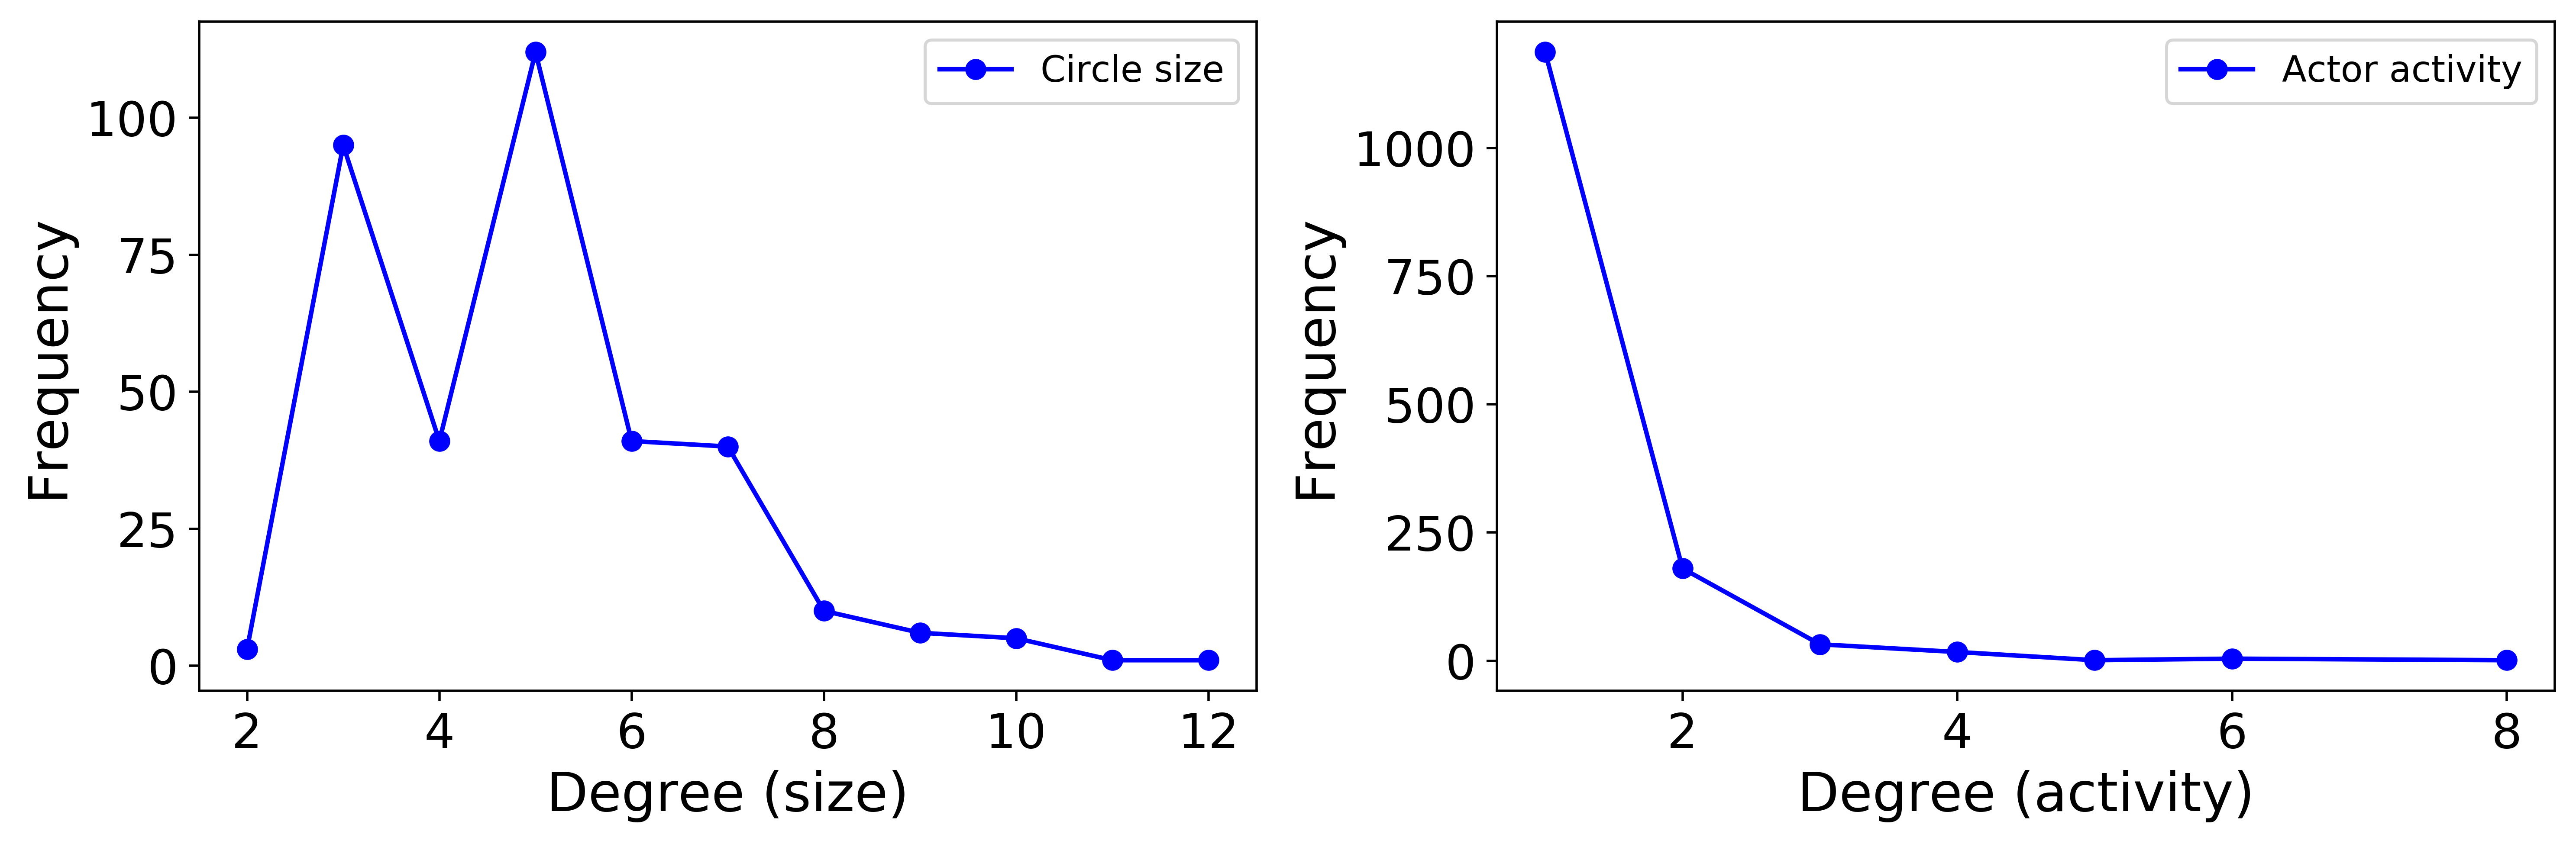

In [54]:
plot_twomode_dist(board_size_dist,director_activ_dist)

In [55]:
# Plotting the mafia network degree distributions
event_size_dist = Counter(sorted(dict(events_size).values()))
actor_activ_dist = Counter(sorted(dict(actors_activ).values()))

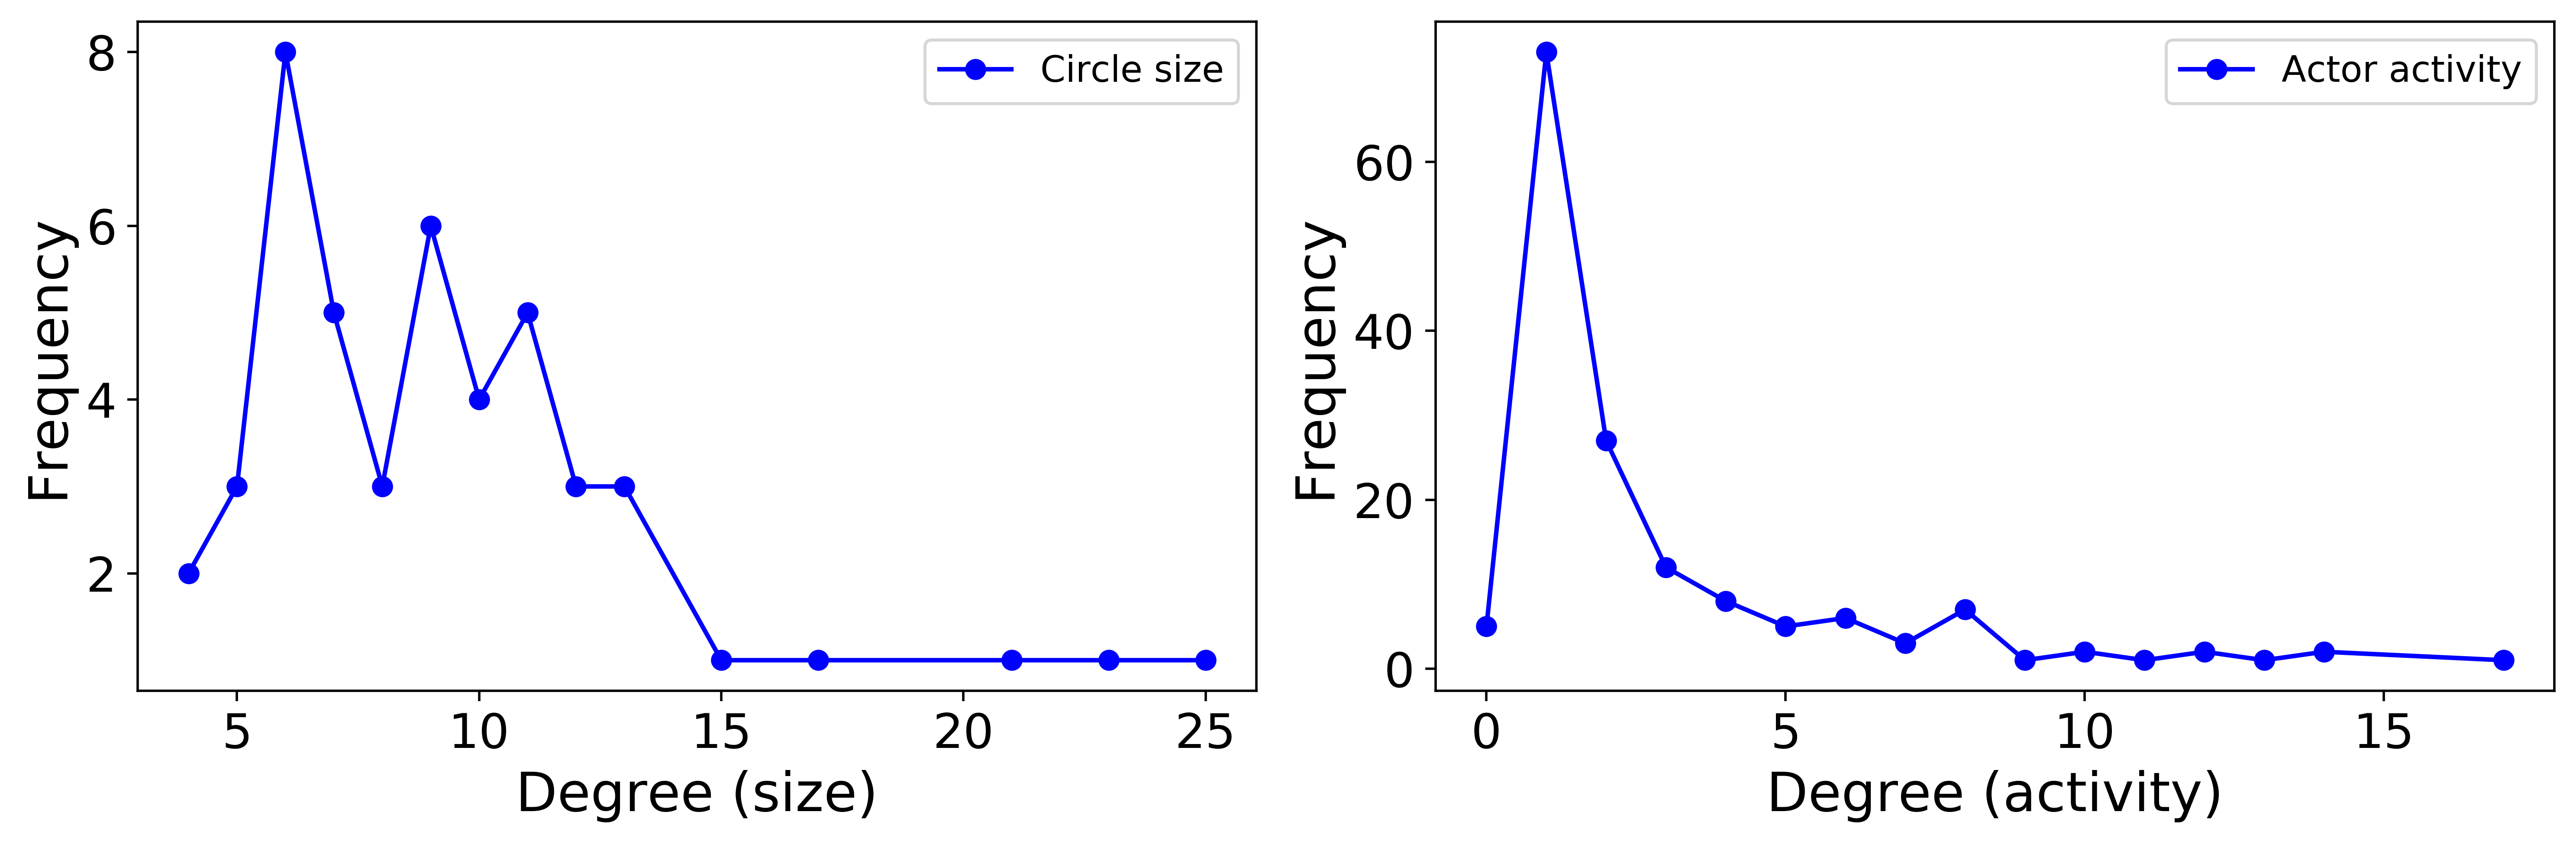

In [56]:
plot_twomode_dist(event_size_dist,actor_activ_dist)

In [57]:
# Now let's see the degree distributions of the projections
Gs = [bipartite.projected_graph(B[0],directors),bipartite.projected_graph(B[1],actors)]
Gm = [bipartite.projected_graph(B[0],directors, 'MultiGraph'),
      bipartite.projected_graph(B[1],actors,'MultiGraph')]
Gw = [bipartite.weighted_projected_graph(B[0],directors),bipartite.weighted_projected_graph(B[1],actors)]

In [58]:
print(Gs,Gm,Gw)

[<networkx.classes.graph.Graph object at 0x7f322e85ce50>, <networkx.classes.graph.Graph object at 0x7f3232169690>] [<networkx.classes.multigraph.MultiGraph object at 0x7f3232213e90>, <networkx.classes.multigraph.MultiGraph object at 0x7f32320b1ed0>] [<networkx.classes.graph.Graph object at 0x7f32321429d0>, <networkx.classes.graph.Graph object at 0x7f32322fbd90>]


In [59]:
# Plotting projected degree distributions
def plot_proj_dist(Gs,Gm):
    
    # Note that now we are counting the degree inside the function. Both ways are fine, it depends on
    # the variable you want to work with and store
    pop_dist = Counter(sorted(dict(Gs.degree()).values()))
    str_dist = Counter(sorted(dict(Gm.degree()).values()))
    
    # figure environment
    # now, we will plot both in the same axis
    fig, ax = plt.subplots()
    
    # plotting
    ax.plot(list(pop_dist.keys()),list(pop_dist.values()),'bo', linestyle='-', label='Popularity')
    ax.plot(list(str_dist.keys()),list(str_dist.values()),'ro', linestyle='-', label='Strength')
    
    # axis set-up
    ax.set_xlabel('Degree', fontsize=18)
    ax.set_ylabel('Frequency', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.legend(loc='upper right', fontsize=12, ncol=1, frameon=True)
    
    plt.tight_layout()
    plt.show()

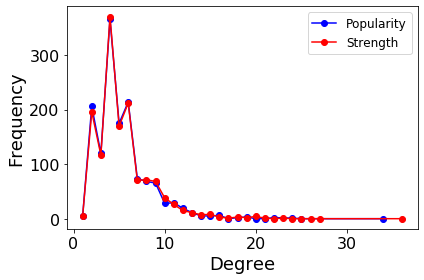

In [60]:
plot_proj_dist(Gs[0],Gm[0])

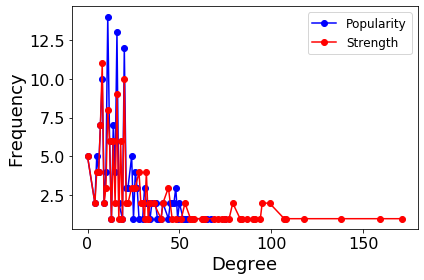

In [61]:
plot_proj_dist(Gs[1],Gm[1])

#### From now on, let's focus on the mafia network

In [62]:
# Let's see who are the node with highest degrees: size, activity, popularity and strength

In [63]:
def get_highest(degree_dict,degree_type):

    # ordering dictionary by value
    q = Counter(dict(degree_dict))

    print('Highest ' + degree_type)
    for k, v in q.most_common(5):
        print('%s: %i' % (k, v))

In [64]:
get_highest(events_size,'degree - circle size')

Highest degree - circle size
03/05/2008, lunch at  motocross track in CARDANO AL CAMPO (Va): 25
'31/10/2009, summit at residential care “Falcone e Borsellino” in Paderno Dugnano (Mi): 23
20/03/2009(L), dinner-celebration at "La Rosa Locanda" - Liscate (Mi): 21
'26/04/2008 dinner at  “Fornace” restaurant (Solaro): 17
'23/05/2009, summit-dinner at “La Masseria” restaurant in Cisliano (Mi): 15


In [65]:
get_highest(actors_activ,'degree - actor activity')

Highest degree - actor activity
PANETTA Pietro Francesco: 17
LAMARMORE Antonino: 14
MANNO Alessandro: 14
MAGNOLI Cosimo Raffaele: 13
SANFILIPPO Stefano: 12


In [66]:
get_highest(dict(Gs[1].degree()),'degree - actor popularity')

Highest degree - actor popularity
MANNO Alessandro: 75
LAMARMORE Antonino: 67
PANETTA Pietro Francesco: 65
MAGNOLI Cosimo Raffaele: 54
BARRANCA Cosimo: 53


In [67]:
get_highest(dict(Gm[1].degree()),'degree - actor strength')

Highest degree - actor strength
MANNO Alessandro: 171
LAMARMORE Antonino: 159
PANETTA Pietro Francesco: 138
SANFILIPPO Stefano: 118
MAGNOLI Cosimo Raffaele: 108


## Overlapping (four cycles)

In [68]:
# what about overlapping (four cycles)?
import itertools
def four_cycles(G):
    cycles = 0
    for v in G:
        for u, w in itertools.combinations(G[v], 2):
            cycles += len((set(G[u]) & set(G[w])) - set([v]))
    return cycles / 4

In [69]:
print(four_cycles(B[0]))
print(four_cycles(B[1]))

92.0
1782.0


In [70]:
# The fraction of four-cycles with respect to the number of actors
print(four_cycles(B[0])/len(directors))
print(four_cycles(B[1])/len(actors))

0.05263157894736842
11.423076923076923


In [72]:
# Another way of analyzing overlaps is with the diversity of neighbors based on interactions
from collections import defaultdict

diversity = defaultdict()
for actor in actors:
    if Gm[1].degree[actor] != 0:
        diversity[actor] = Gs[1].degree[actor]/Gm[1].degree[actor]
    else:
        diversity[actor] = 0

In [73]:
print(diversity['LAMARMORE Antonino'])
print(diversity['PANETTA Pietro Francesco'])
print(diversity['SANFILIPPO Stefano'])
print(diversity['MAGNOLI Cosimo Raffaele'])

0.42138364779874216
0.47101449275362317
0.3898305084745763
0.5


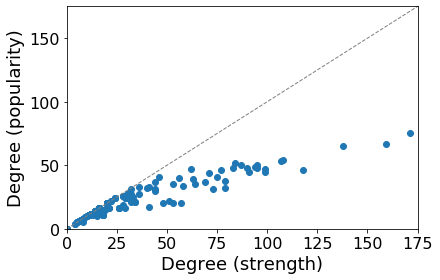

In [74]:
# plotting diversity
# figure environment
fig, ax = plt.subplots()

#plotting
ax.scatter([Gm[1].degree[actor] for actor in actors],[Gs[1].degree[actor] for actor in actors])
ax.plot(range(5000),range(5000),color='gray',linewidth=1.0, linestyle='--')

# axis set-up
ax.set_xlabel('Degree (strength)', fontsize=18)
ax.set_ylabel('Degree (popularity)', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylim(0,175)
ax.set_xlim(0,175)

plt.tight_layout()
plt.show()

## Comparing the structure with random networks

In [75]:
# Is this too much overlapping? What about the degree distributions?
# We can compare the empirical structure to a two-mode network with the same number of nodes in both
# sets and links, but where connections happen at random.

r_events = range(0,len(events))
r_actors = range(1000,len(actors))

print(len(events),len(actors))

47 156


In [78]:
E = sum(list(dict(events_size).values()))
print(E)

455


In [79]:
import random

def get_random(top,bottom,E):
    Rb = nx.Graph()
    R_actors = set()
    R_events = set()
    for i in range(E):
        a = random.choice(bottom)
        R_actors.add(a)
        e = random.choice(top)
        R_events.add(e)
        Rb.add_edge(a,e)
        
    return Rb, R_events, R_actors

In [80]:
Rb, R_events, R_actors = get_random(events,actors,E)

In [81]:
print(four_cycles(Rb))

194.0


In [82]:
R_circle_sizes, R_actors_acts = bipartite.degrees(Rb,actors) # dictionary: nodes as keys, degrees as values

In [85]:
R_size_dist = Counter(sorted(dict(R_circle_sizes).values()))
R_activ_dist = Counter(sorted(dict(R_actors_acts).values()))
print(R_size_dist)
print(R_activ_dist)

Counter({7: 9, 12: 8, 11: 6, 10: 5, 5: 4, 9: 4, 8: 3, 14: 3, 13: 2, 3: 1, 4: 1, 15: 1})
Counter({3: 40, 2: 31, 1: 22, 4: 22, 5: 21, 6: 3, 7: 3, 9: 1})


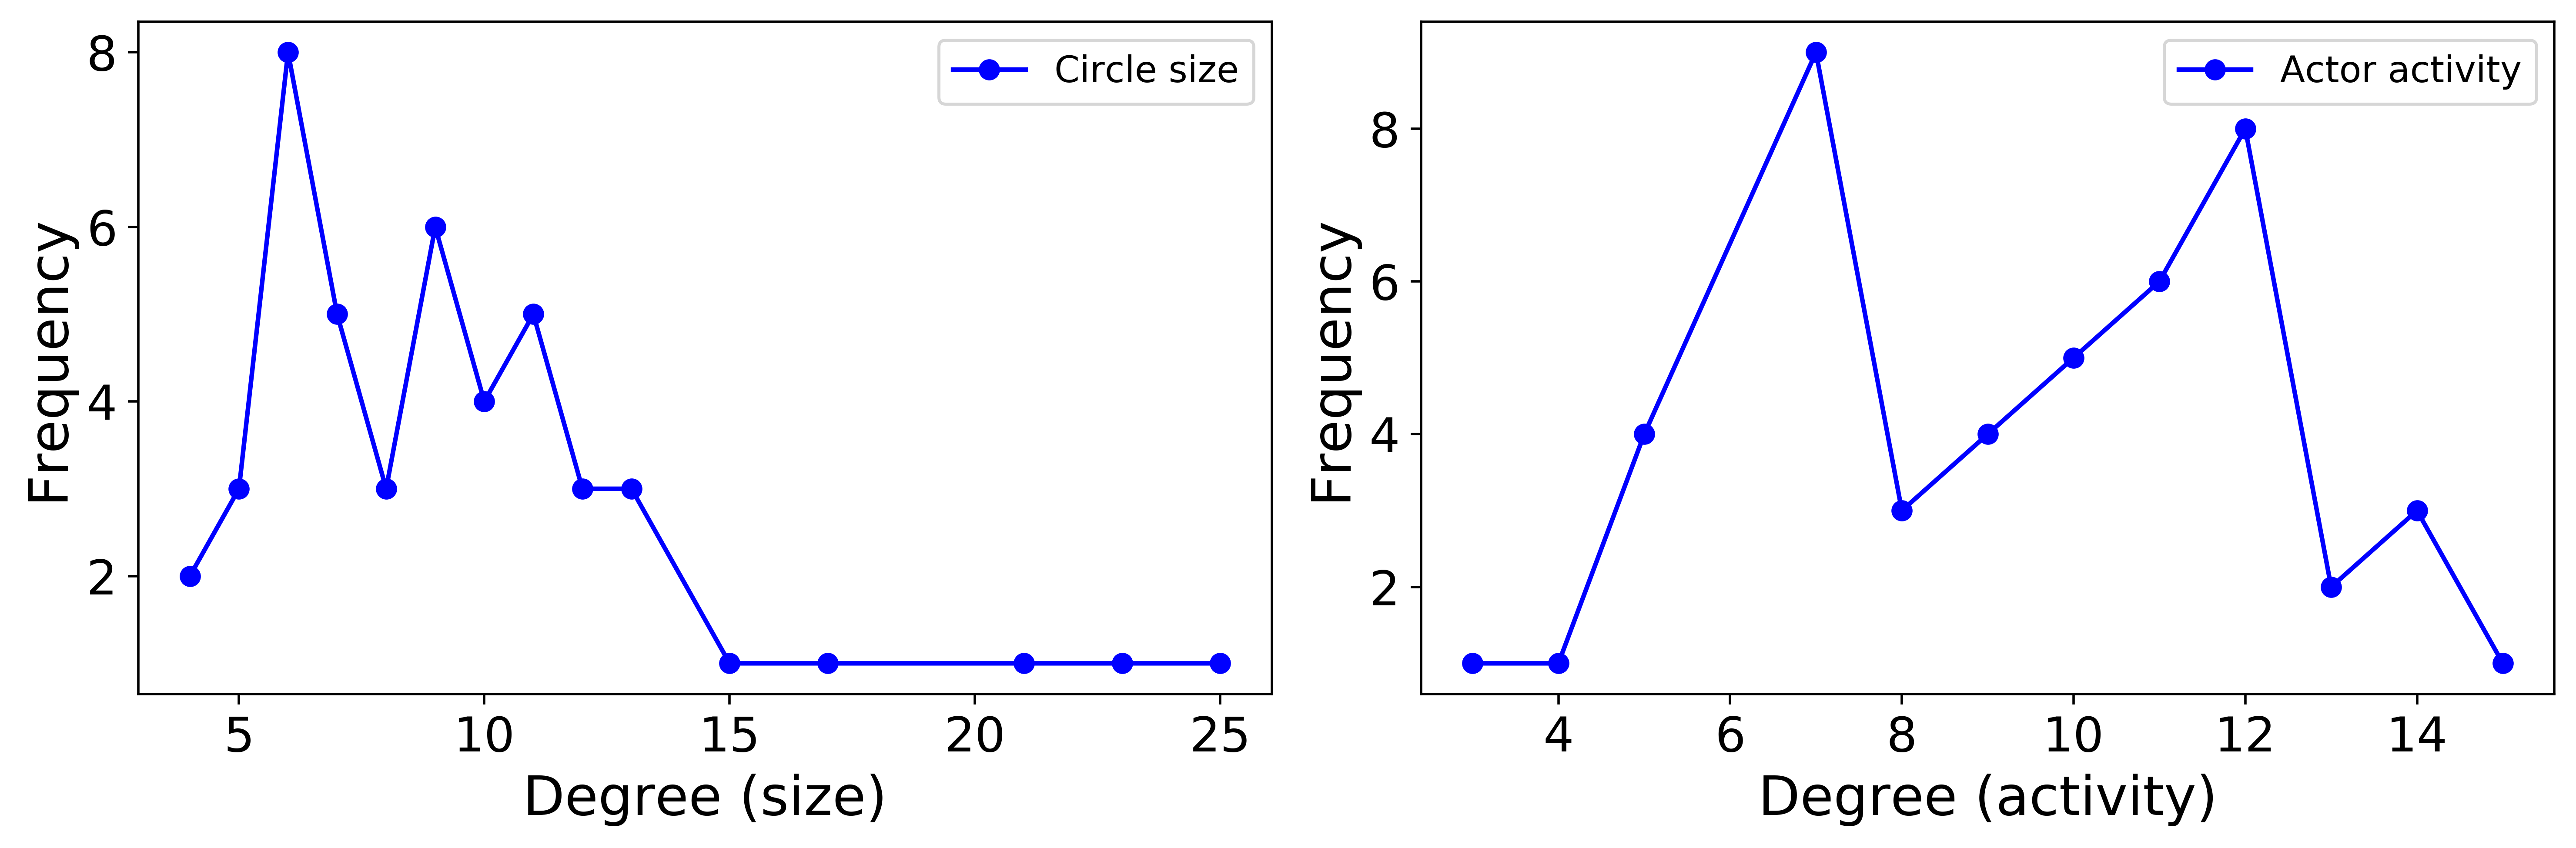

In [86]:
# Just to quickly compare the degree distributions, we can use the ploting function for the two-mode
# network. However, we have to disregard the legend and the x-axis label. For a better figure
# we need to edit the plotting function or create a more suitable one.

plot_twomode_dist(event_size_dist,R_size_dist)

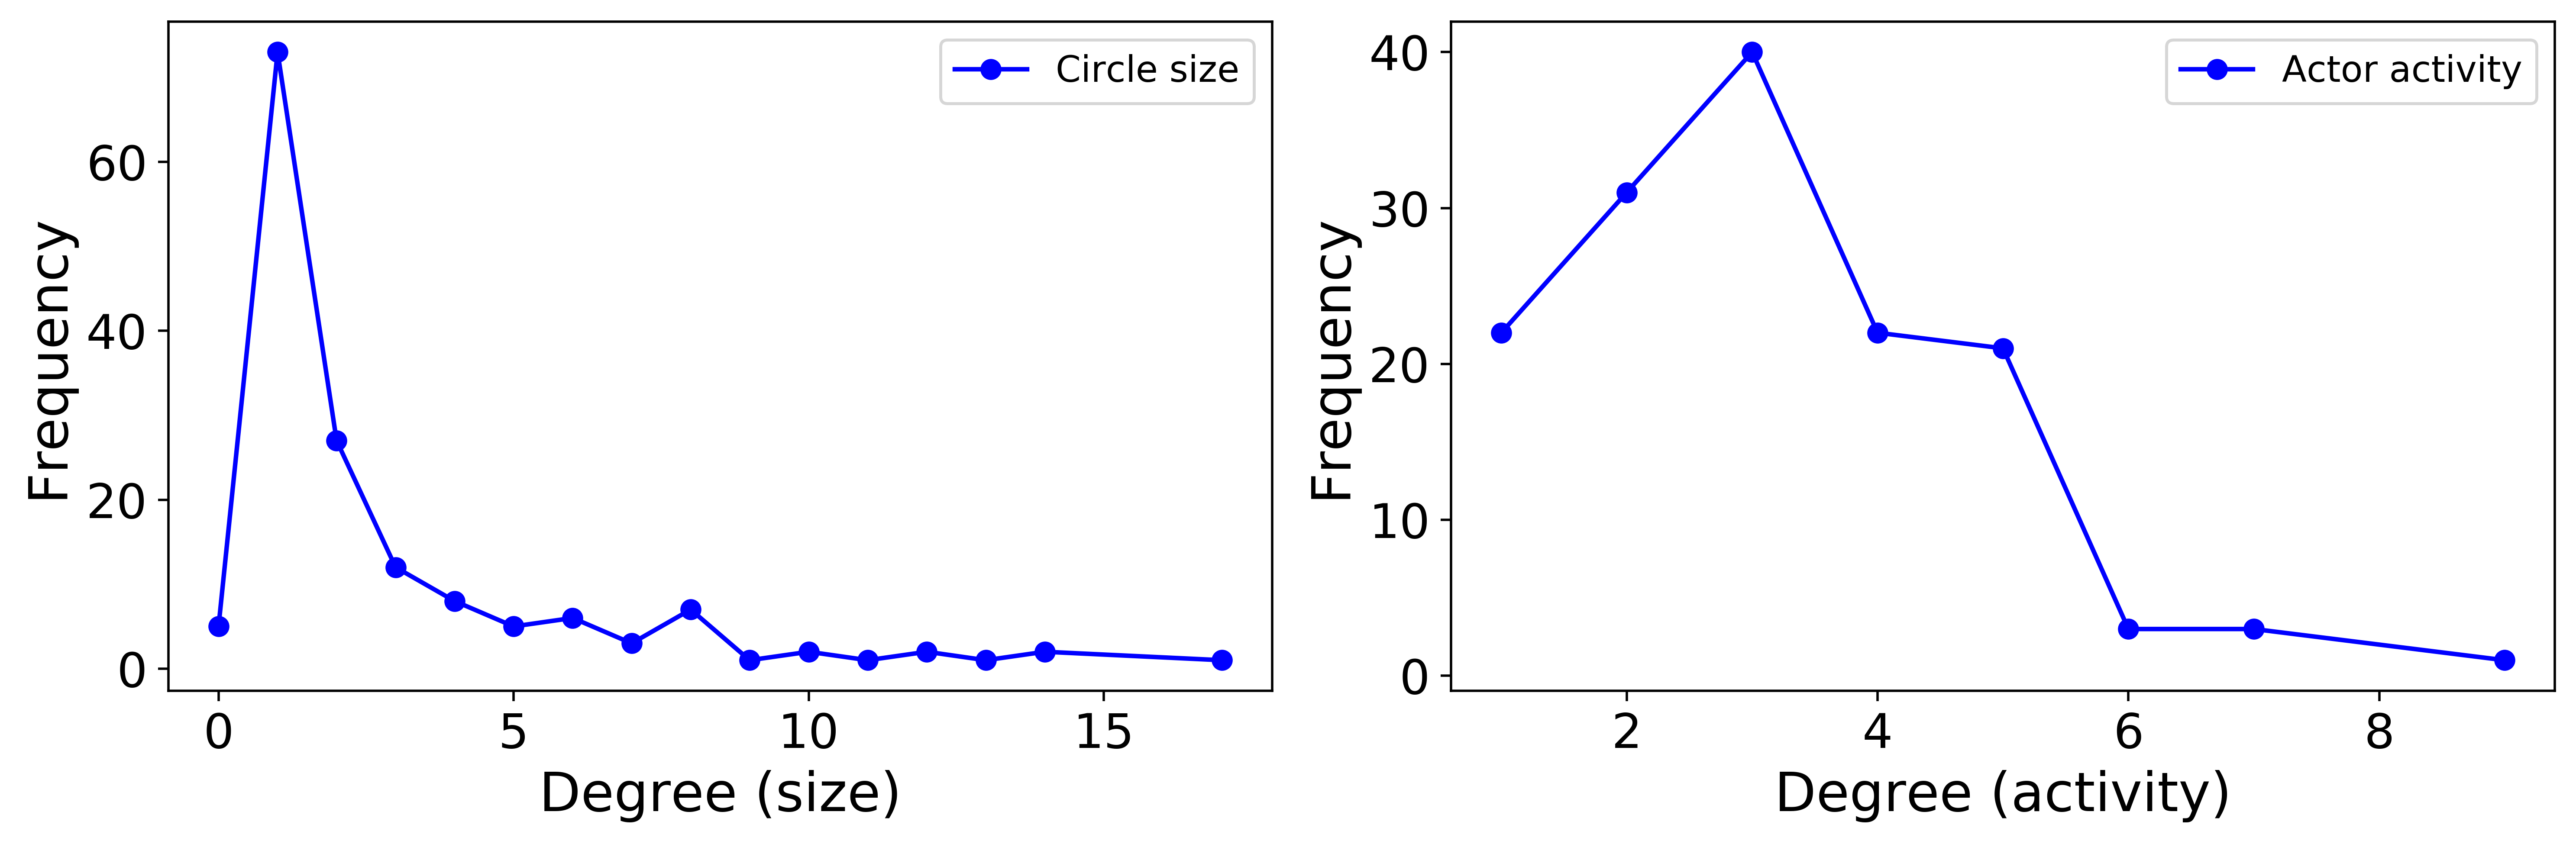

In [87]:
plot_twomode_dist(actor_activ_dist,R_activ_dist)

In [88]:
pop_dist = Counter(sorted(dict(Gs[1].degree()).values()))
str_dist = Counter(sorted(dict(Gm[1].degree()).values()))

RGs = bipartite.projected_graph(Rb,R_actors)
RGm = bipartite.projected_graph(Rb,R_actors,'MultiGraph')

R_pop_dist = Counter(sorted(dict(RGs.degree()).values()))
R_str_dist = Counter(sorted(dict(RGm.degree()).values()))

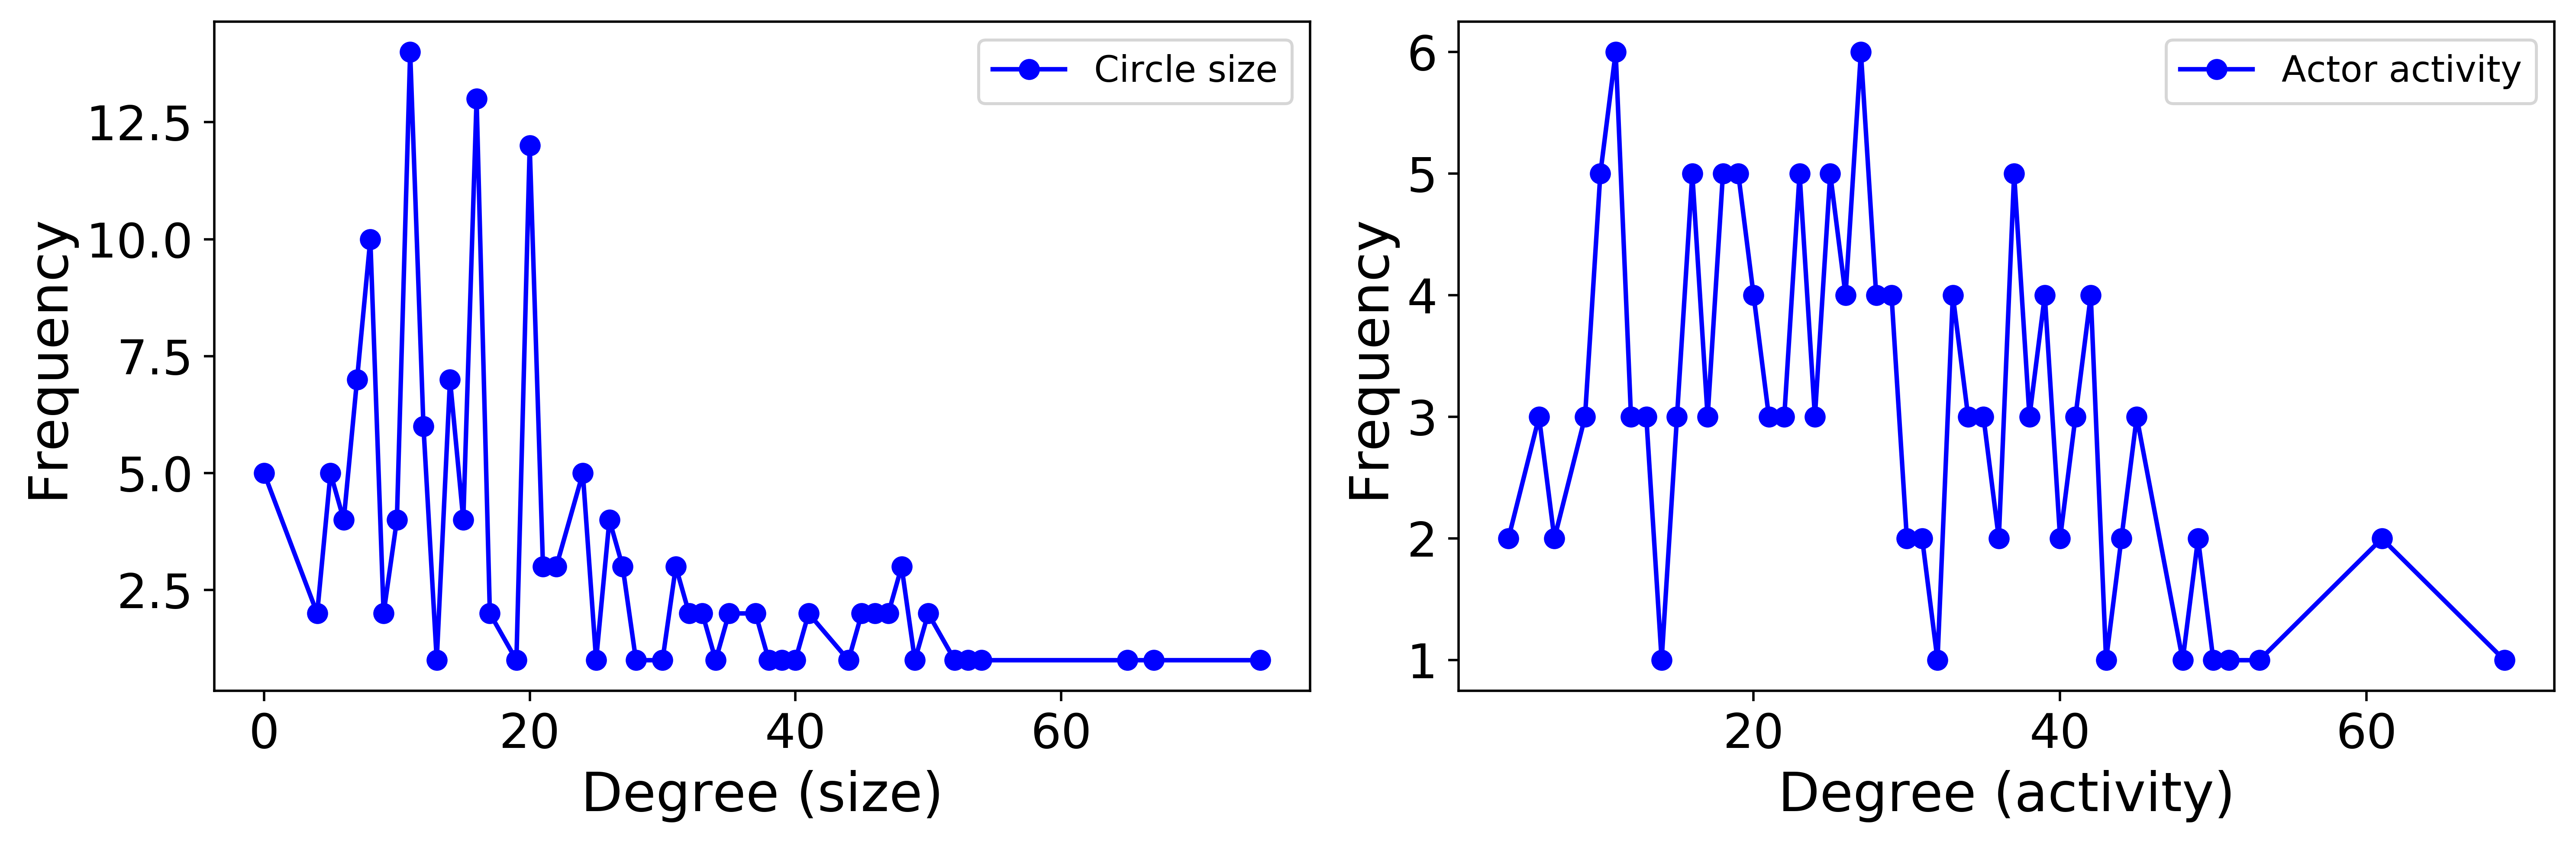

In [89]:
# Again, we have to disregard the legend and the x-axis label. For a better figure
# we need to edit the plotting function or create a more suitable one.
plot_twomode_dist(pop_dist,R_pop_dist)

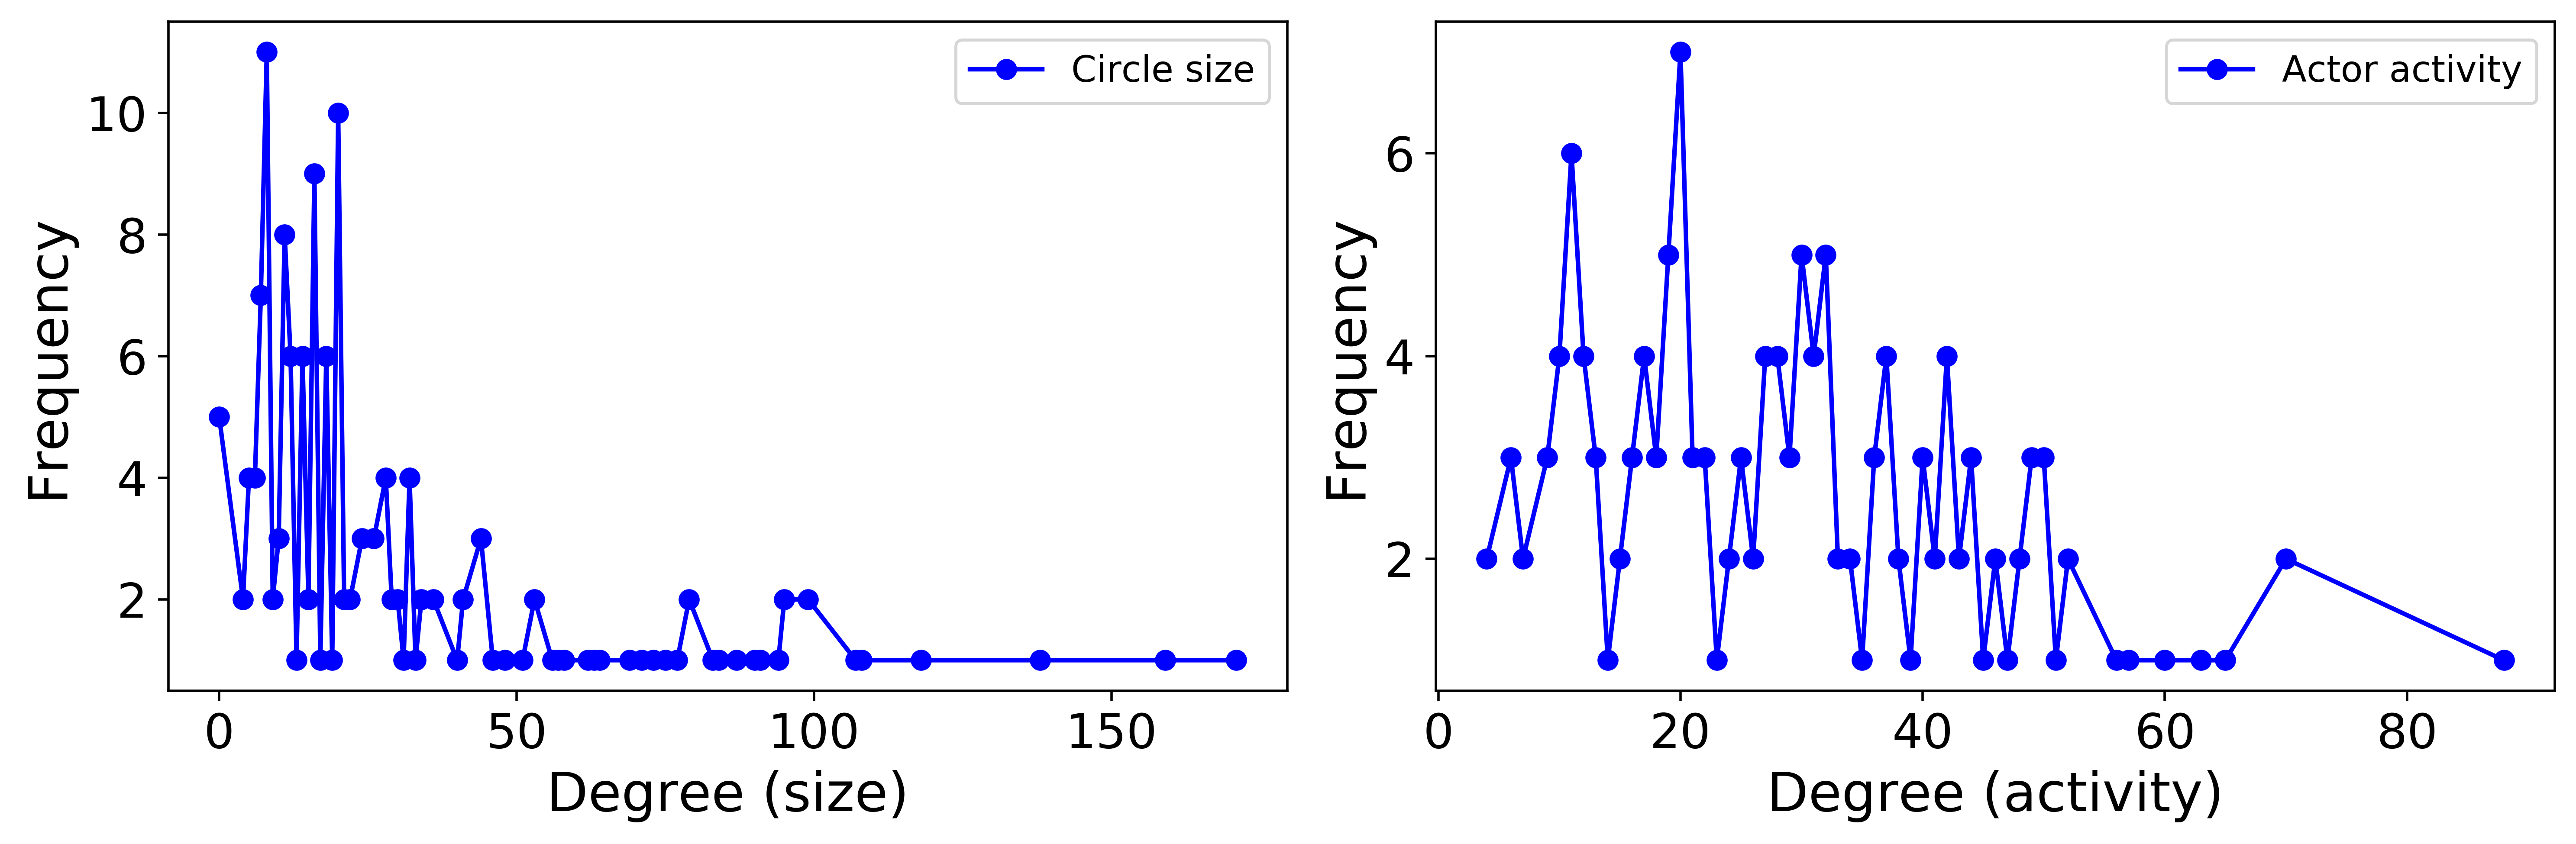

In [90]:
plot_twomode_dist(str_dist,R_str_dist)

## Visualization

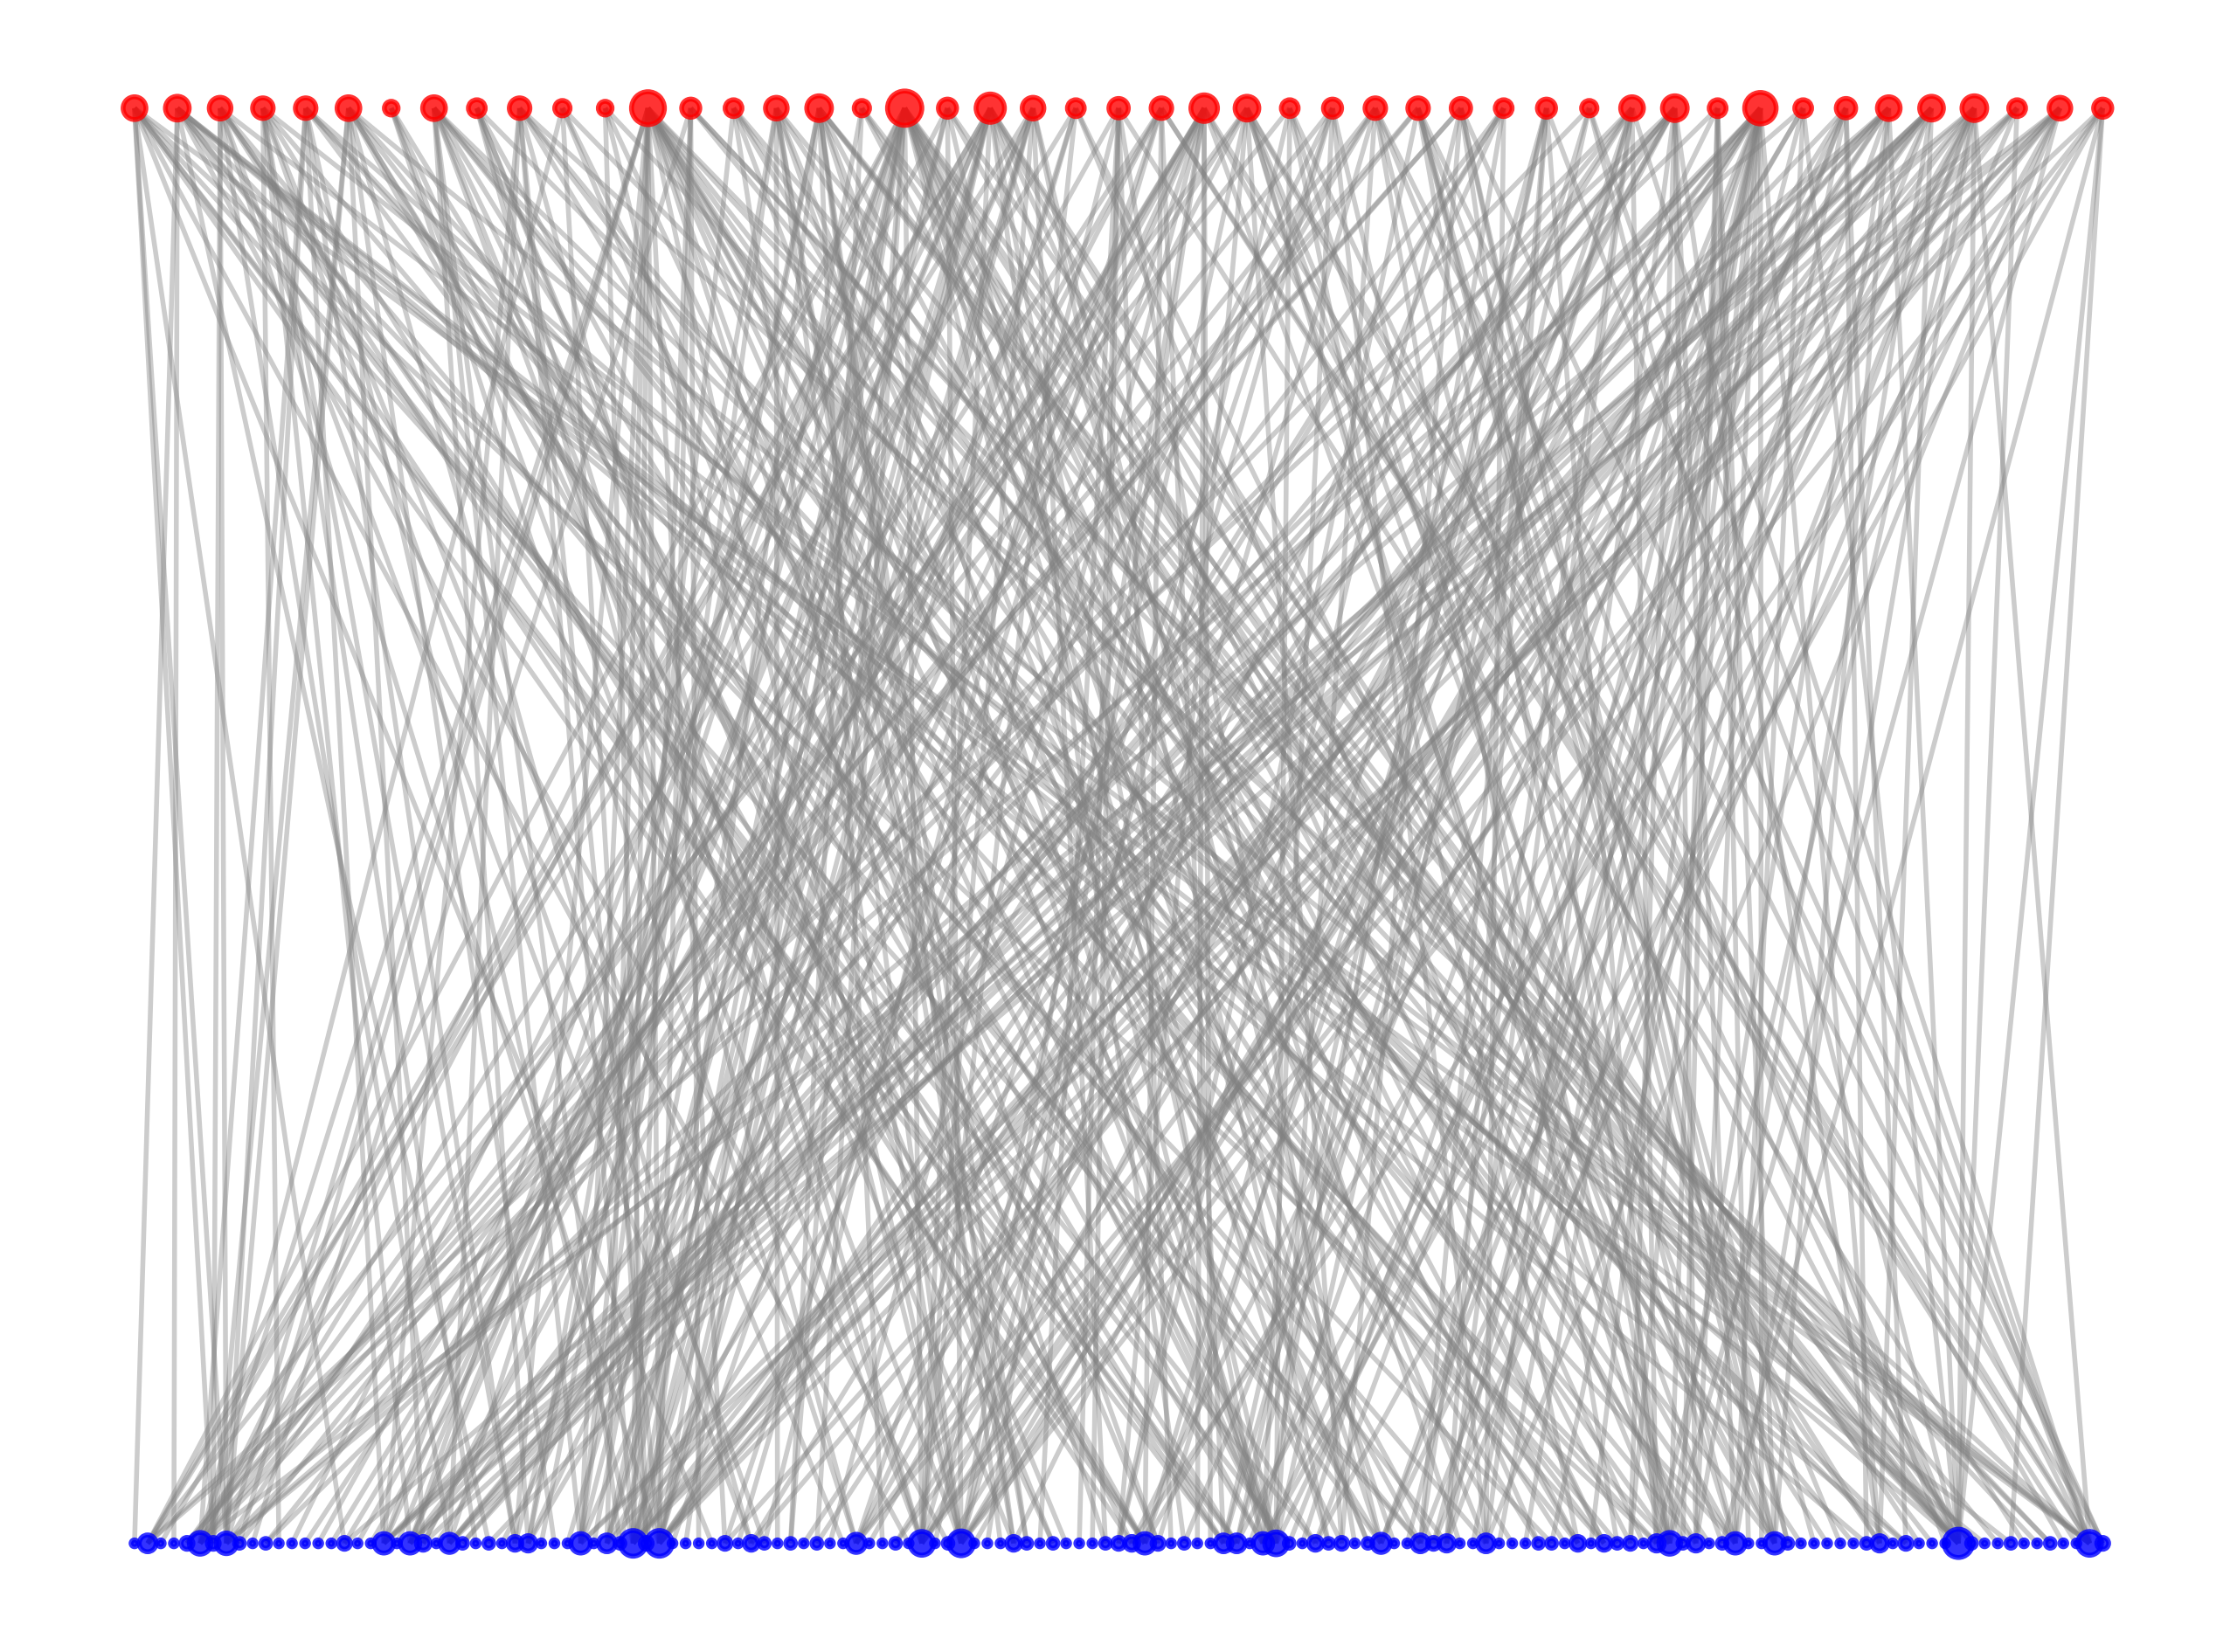

In [91]:
# Visualizing the two-mode network. For that, we will get rid of the isolates (actors without events)

isolates = [actor for actor in actors if B[1].degree(actor)==0]
B[1].remove_nodes_from(isolates)

f = plt.figure(1,figsize=(8,6), dpi=400)

# defining the layout
pos = nx.bipartite_layout(B[1], events, align='horizontal', scale=1, center=None, aspect_ratio=4/3)

# node colors
colors = {0:'r', 1:'b'}

# nodes
nx.draw_networkx_nodes(B[1], pos=pos, \
                node_size=[B[1].degree[node]*2 for node in B[1]], \
                alpha=0.8, \
                node_color=[colors[B[1].nodes[node]['bipartite']] for node in B[1]])

# links
nx.draw_networkx_edges(B[1], pos=pos, alpha=0.4, \
                       edge_color='gray')

plt.axis('off')
plt.show()

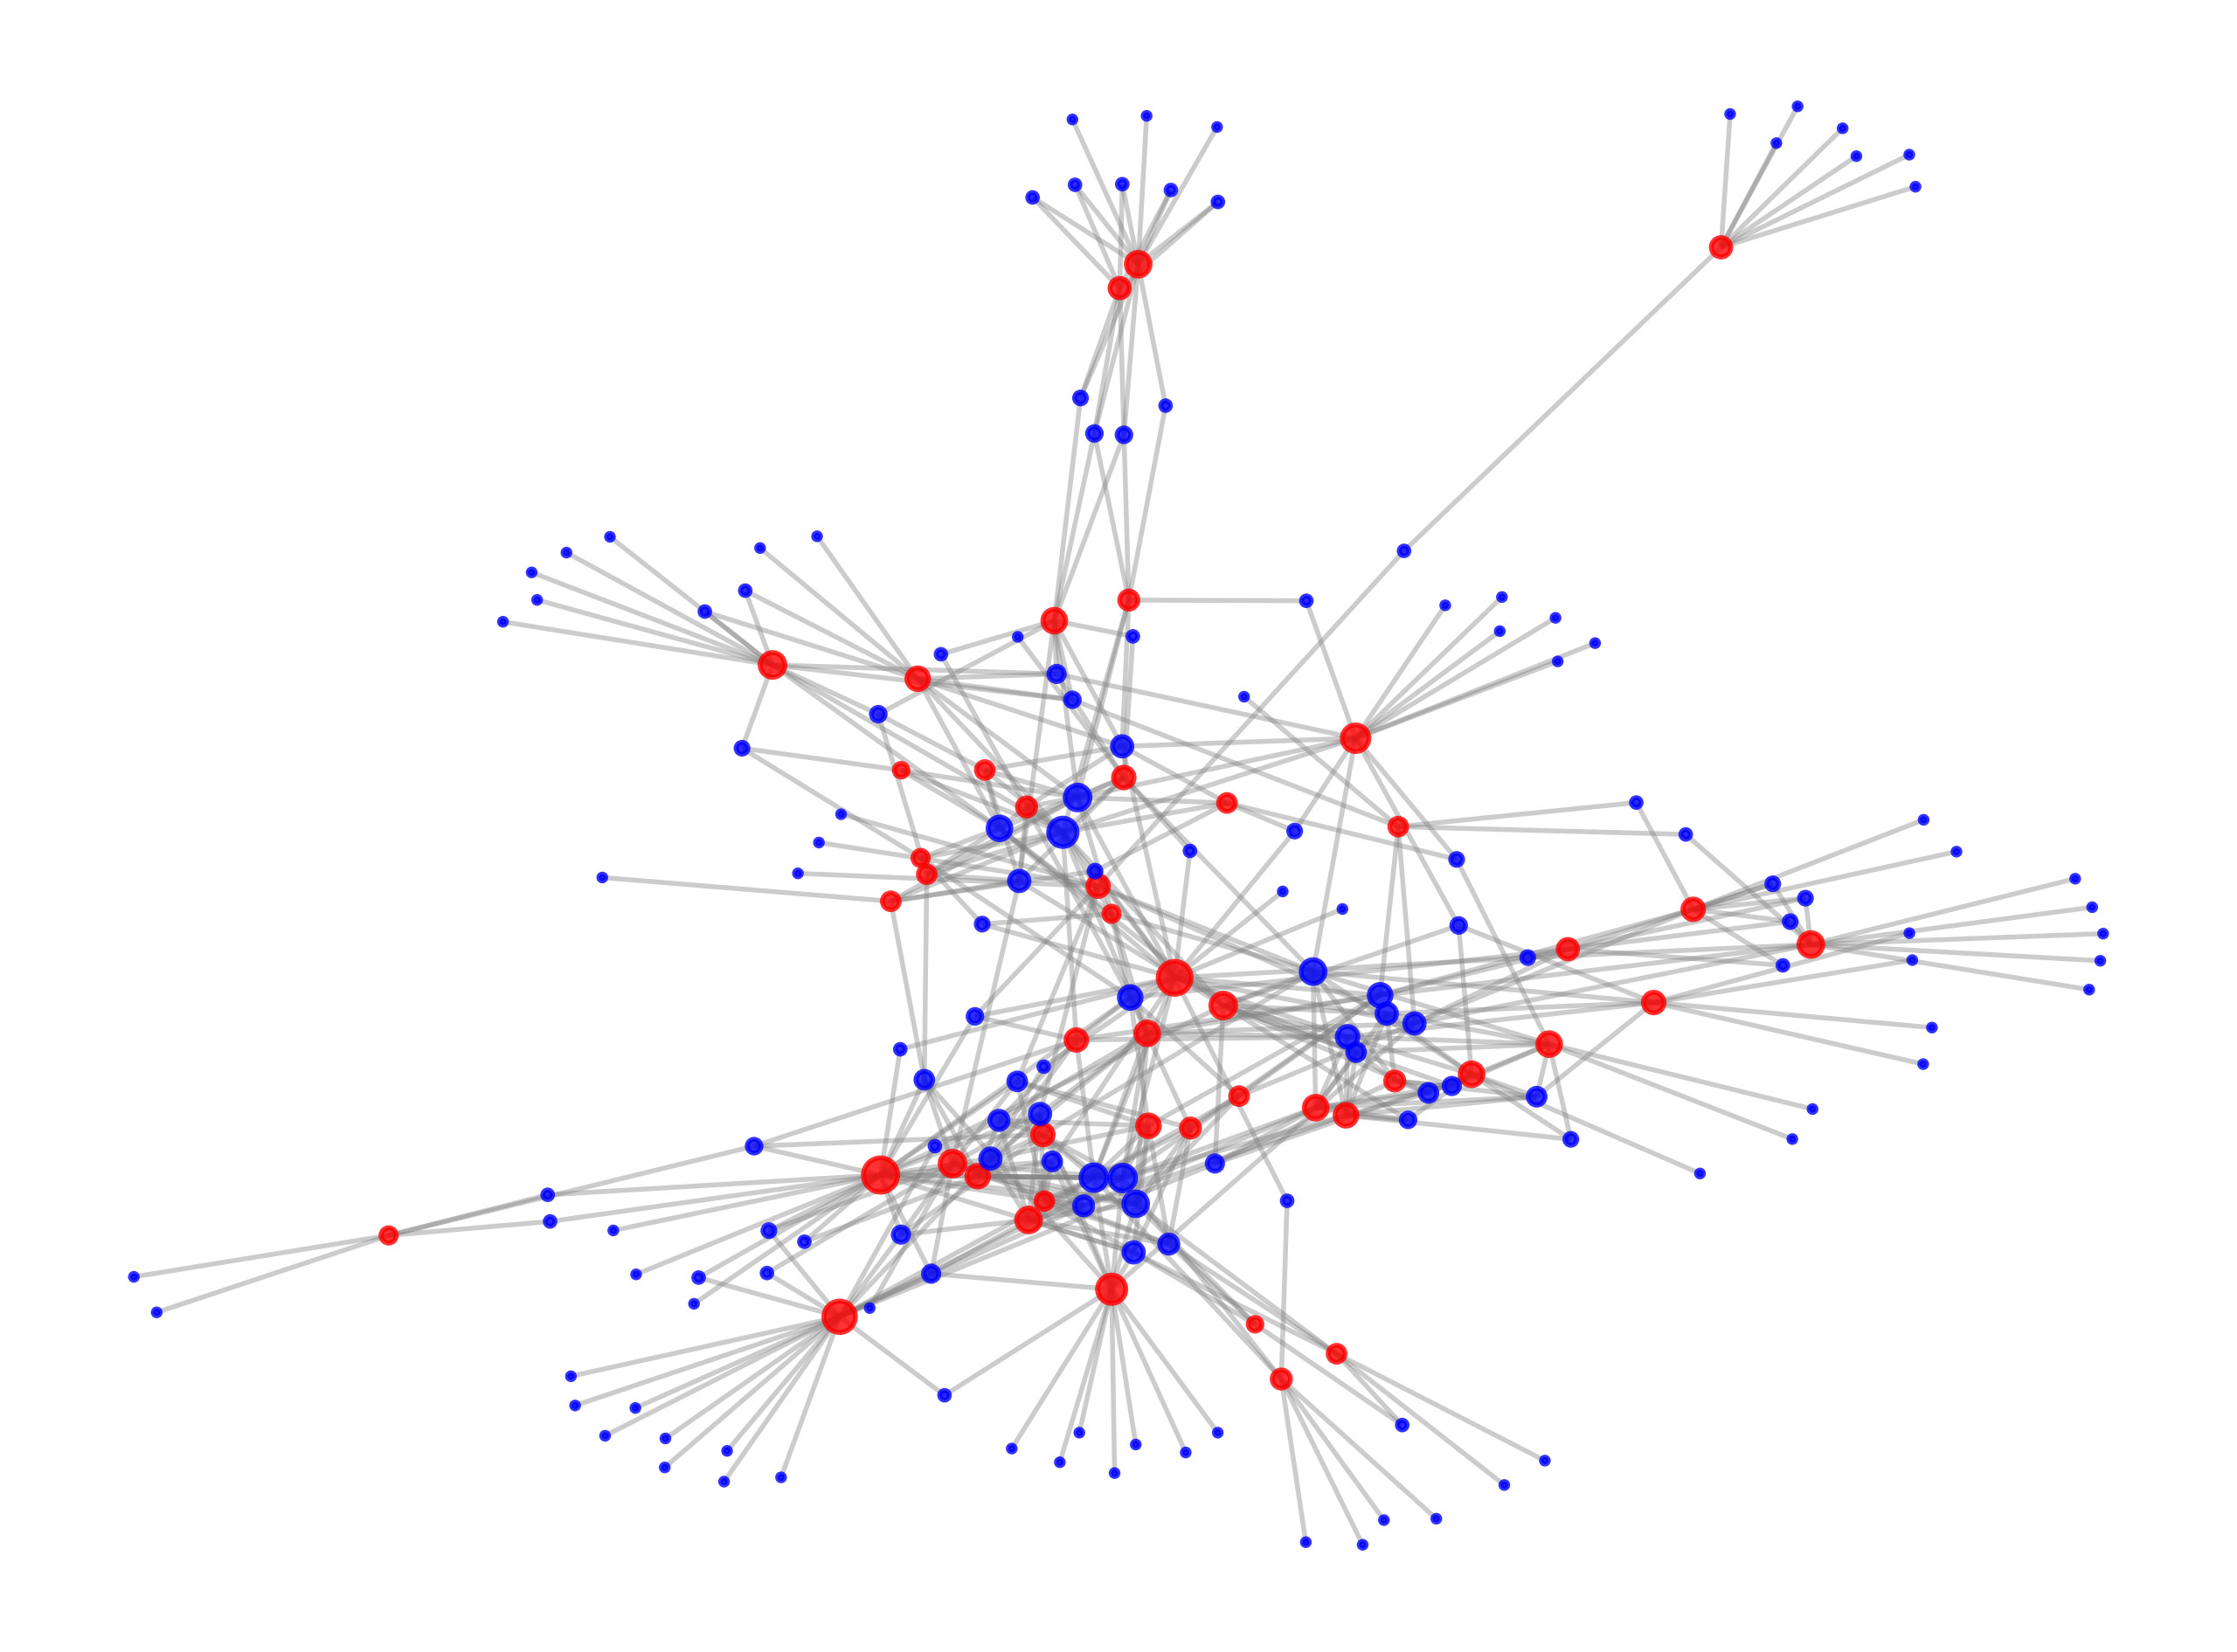

In [92]:
# Visualizing the two-mode network without the horizontal alignment

f = plt.figure(1,figsize=(8,6), dpi=400)

# defining the layout
pos = nx.spring_layout(B[1])

# node colors
colors = {0:'r', 1:'b'}

# nodes
nx.draw_networkx_nodes(B[1], pos=pos, \
                node_size=[B[1].degree[node]*2 for node in B[1]], \
                alpha=0.8, \
                node_color=[colors[B[1].nodes[node]['bipartite']] for node in B[1]])

# links
nx.draw_networkx_edges(B[1], pos=pos, alpha=0.4, \
                       edge_color='gray')

plt.axis('off')
plt.show()

In [93]:
# Let's remove the isolates from the projected network too
Gw[1].remove_nodes_from(isolates)

In [94]:
import community

#dict - node as key, community number as value
comm_dict = community.best_partition(Gw[1])
print(comm_dict)

# set of communities - community numbers
comm_set = set(list(comm_dict.values())) 
print(comm_set)

comm_org = {comm:[] for comm in list(comm_set)}
for node, comm in comm_dict.items():
    comm_org[comm].append(node)
print(comm_org)

{'ALBANESE Giuseppe Domenico': 0, 'ALVIANO Umberto': 1, 'ANGHELONE Francesco': 2, 'ARENA Carmelo': 3, 'ARENA Salvatore': 3, 'ASCONE Rocco': 2, 'BALDASSARRE Arturo': 0, 'BARRANCA Armando': 4, 'BARRANCA Cosimo': 4, 'BARRANCA Fabio': 4, 'BARRANCA Giuseppe': 4, 'BARRANCA Massimo Giacomo': 4, 'BELCASTRO Pierino': 3, 'BELNOME Antonio': 5, 'BENEVENTO Antonio': 3, 'BENEVENTO Mario': 3, 'BILLARI Costantino Carmelo': 3, 'BRANCATISANO Bruno': 2, 'BRANCATISANO Pietro': 2, 'BRUZZESE Carmelo': 0, 'CAMMARERI Annunziato': 1, 'CAMMARERI Vincenzo': 1, 'CANDELORO Pio': 0, 'CARETTA Sergio': 2, 'CARMELO Novella': 3, 'CHIARELLA Leonardo Antonio': 4, 'CICALA Pasquale': 2, 'CICHELLO Pietro': 3, 'COLUCCIO Domenico': 0, 'COLUCCIO Rocco': 0, 'COMMISSO Domenico Sandro': 0, 'COMMISSO Giuseppe': 4, 'CRICELLI Davide': 4, 'CRICELLI Ilario': 4, 'CRISTELLO Francesco': 5, 'CRISTELLO Rocco': 4, 'Carmelo': 3, 'DE CASTRO Emanuele': 3, 'DE MARCO Salvatore': 2, 'FARAO Silvio': 3, 'FERRAGINA Salvatore': 3, 'FERRARO Salvatore'

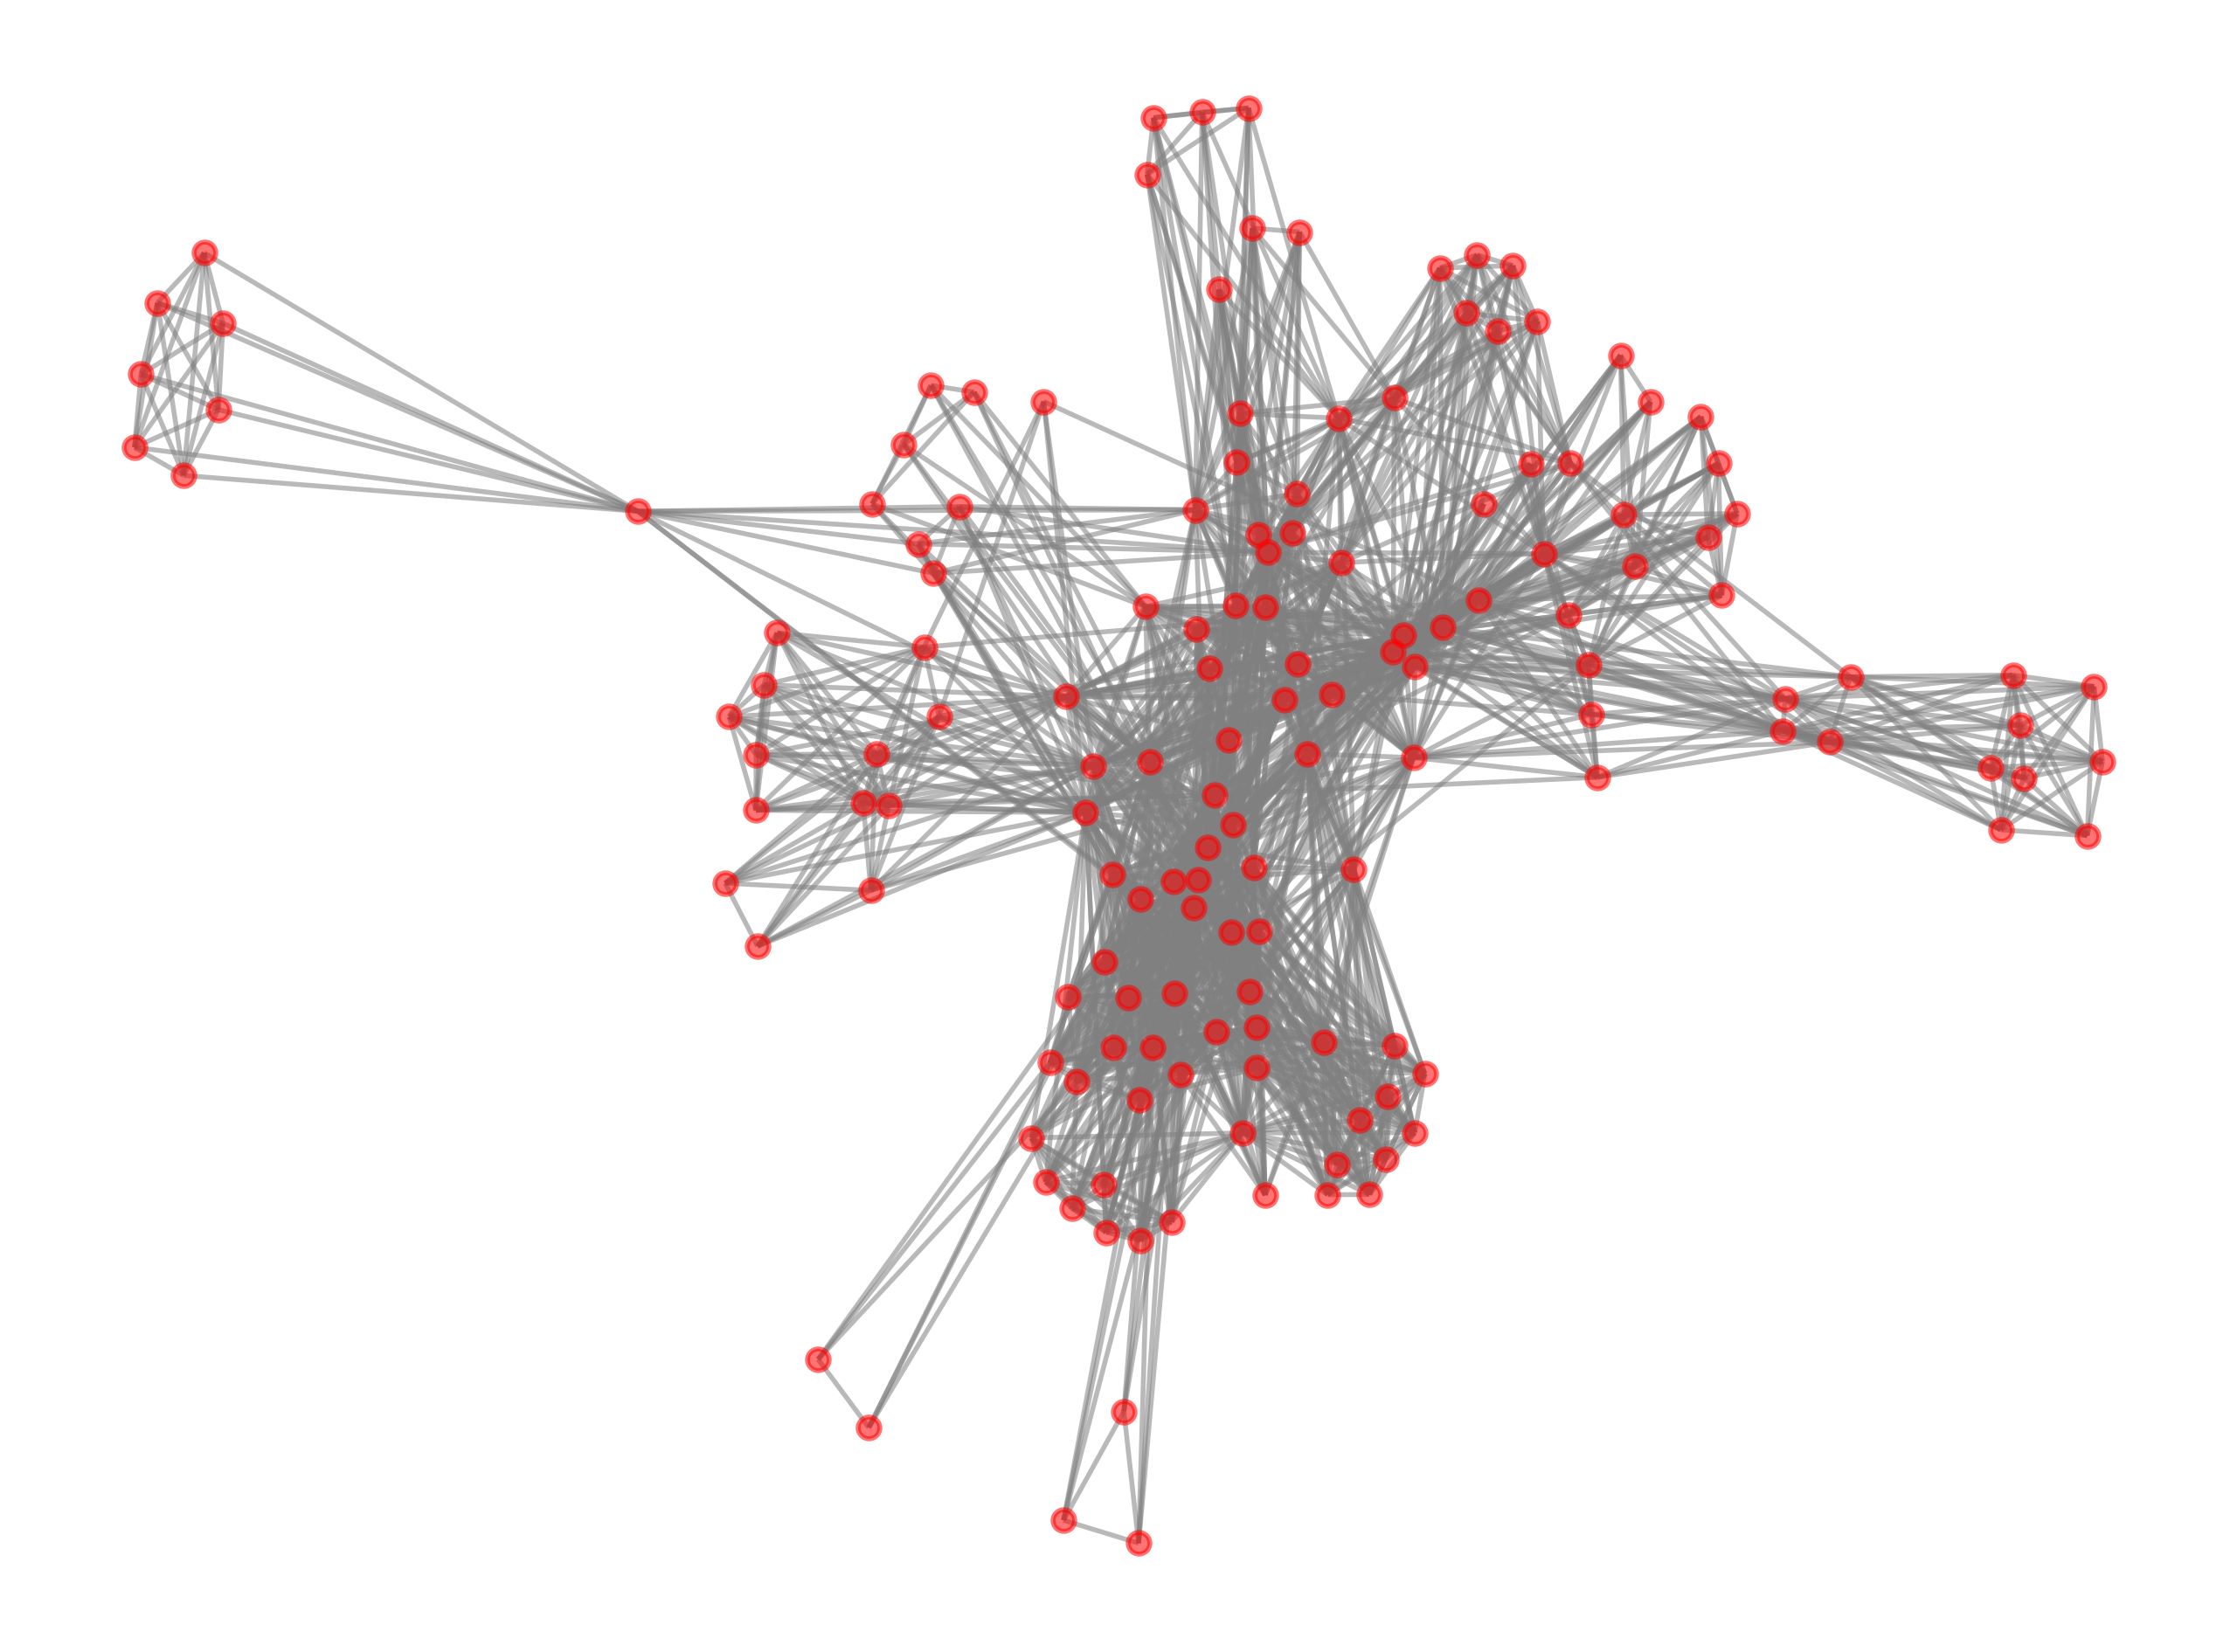

In [95]:
# Simple drawing

# Figure environment
f = plt.figure(1,figsize=(8,6), dpi=400)

# Network layout
pos=nx.spring_layout(Gw[1])

# Drawing the whole network
nx.draw_networkx(Gw[1], pos=pos, with_labels=False, node_size=20, \
                 node_color='r',alpha=0.55,edge_color='gray')

# Showing the figure
plt.axis('off')
plt.show()

In [96]:
# Betweenness centrality
bt_ct = nx.betweenness_centrality(Gw[1], normalized=True, weight='weight')

In [97]:
# Betweenness centrality
bt_ct = Counter(nx.betweenness_centrality(Gw[1], normalized=True, \
                                                      weight='weight'))

print('Highest betweenness centrality')
for u, q in bt_ct.most_common(10):
    print('%s: %f' % (u, q))

NameError: name 'collections' is not defined

In [ ]:
# More advanced drawing
# Figure environment
f = plt.figure(1,figsize=(8,6), dpi=400)

# Network layout
pos=nx.spring_layout(Gw[1],iterations=50,weight='weight',scale=1.0, k=0.40, seed=25) 

# Node colors based on communities
colors={0:'#e41a1c', 1:'#377eb8', 2:'#4daf4a', 3:'#984ea3', 4:'#ff7f00', \
        5:'#ffff33', 6:'#a65628'}

# Labels for the highest between centrality
labelling = {u:u for u,lab in pos.items() if u in pos if bt_ct[u]>0.05} 

# Drawing nodes
nx.draw_networkx_nodes(Gw[1], pos=pos,
                node_size=[max(Gw[1].degree(u)**1.2,5) for u in Gw[1]], \
                alpha=0.8, edge_color='k',\
                node_color=[colors[c] for u,c in comm_dict.items()])

# Drawing edges
weights = [(Gw[1][u][v]['weight']/8) for u,v in Gw[1].edges()]
nx.draw_networkx_edges(Gw[1], pos=pos, width=weights, alpha=0.6, \
                       edge_color='gray')

# Drawing labels
nx.draw_networkx_labels(Gw[1], pos=pos, labels=labelling, font_size=4)

# Showing and saving the figure
plt.axis('off') 
plt.savefig('workshop_mafia_network.png', format='png', dpi=400)
plt.savefig('workshop_mafia_network.pdf', format='pdf', dpi=400)
plt.show()